## Summary

### Pre requisite Steps:
1. ***Imported the required libraries and viewed the data.***
2. ***There were some blank data in the Country, Agent, Company Column.***

### Data Cleaning:
1. ***Dropped one column ‘Reservation_Status’ as it talks about the status and will impact the prediction.***
2. ***Done the imputation on Children, Country, Agent and Company column.***
3. ***Dropped the column Agent and Company as hotels were booked by individuals and Company has 90% blank data.***
4. ***Checked for Outliers and deleted the outlier points from the columns.***

### Data Preparation:
5. ***Converted the columns into Datetime object.***
6. ***Created columns for total stays which include weekend and weekdays stay.***
7. ***Created the column for Guest which consist of the count of Adults, Children, Babies.***
8. ***Replaced the undefined meal to SC (given in the explanation)***
9. ***Dropped few columns as I have created new columns which are the combination of deleted columns.***

### Exploratory Data Analysis:
1. ***Done the Univariate and Multivariate Analysis on the columns to verify the correlation.***
2. ***Used group by function to create a groups***
3. ***Verified the counts and percentage of customer on some columns like booking location, guest type etc.***
4. ***Found variables doesn’t have correlation with the target variables.***
5. ***In multivariate analysis, we verified the relationship between multiple independent variables on dependent variables or independent variables to independent variables.***

### Data Visualization:
1. ***Verified percentage contribution of different columns on the target variable like booking location, booking type, market segment.***
2. ***Checked the distribution of data.***

### Feature Engineering:
1. ***Created the label for categorical data.***
2. ***There are many countries so instead of converting all into categories, I have created 3 levels of it. Portugal, Germany and Other.***
3. ***Use the One Hot Encoder on the categorical variables.***
4. ***Dropped the non-correlated data.***

### Model:
1. ***Split the data into 70:30 ratio.***
2. ***Normalized the data using Standard Scaler.***
3. ***Used the Logistic Regression as our base model with cross validation value as 8.***
4. ***We will use the threshold of 0.5 as there is no real data which is impacting the real time scenario. We just need to predict accurately. Threshold accuracy is also maximum at 0.5***
5. ***Used KNN to predict and loop over 1 to 6 for k value.***
6. ***Used Decision Tree with and without parameters.***
7. ***Done the hyperparameter tuning for sample leaf, max depth and criteria.***
8. ***Got the best result at min_sample_leaf =  35, max_depth= 36, criteria = 36.***
9. ***Accuracy of Decision Tree increases after tuning.***
10. ***Same steps we followed for Random Forest also.***
11. ***For random forest best result obtained at {'n_estimators': 40, 'min_samples_leaf': 50, 'max_features': 30, 'max_depth': 14}***
12. ***Accuracy for Random Forest has decreased after Hyper Parameter Tuning.***
13. ***Used multi layer perceptron for neural network with mentioned parameters (hidden_layer_sizes=[35, 20], alpha=0.001, solver='adam', activation='relu') .***
14. ***Got the highest accuracy for the same.***

### Confusion Matrix:
1. ***Once the models are ready, created the confusion matrix for each model side by side.***

### Conclusion:
1. ***Based upon the below figure, we the say that Random Forest have maximum output.***
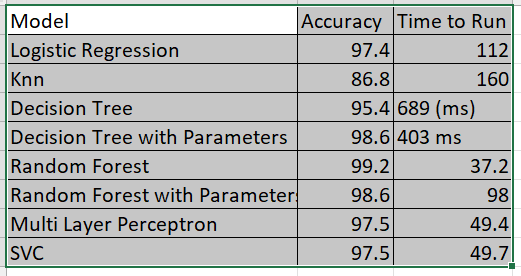

2. ***Accuracy for Random Forest with parameters decreases. So, we decided to select the old one.***
3. ***Other model accuracy increases after the hyperpatameter tuning.***
4. ***Knn is performing worst among all.***
5. ***Our model will work with same accuracy on unseen data also as we have validated it on the test data. Also we have used cross validation.***

### Recommendation:
1.	I could have used PCA for dimensionality reduction which could have been improved the run time of knn.
2.	Use Random Forest or MLP for prediction
3. Data have some missing values related to country which i would like to know more about it.




## Model Explanation:

### KNN:

1.	It is a ***supervised*** learning and mostly used for classification but can be used for regression also.
2.	It considers ***k nearest data*** points to predict the class.
3.	It is an ***instance-based*** learning model as it use entire training dataset to predict the output.
4.	It is ***lazy*** learning model as learning process is postponed till the time prediction is requested.
5.	Non-Parametric
6.	It is based on a principle of ***k nearest neighbor.*** Nearest neighbors are data points that have minimum distance from our new data point.K – is the number of such data points to consider.
7.	Euclidean distance is the most important distance metric but can use other distance metric also like Manhattan or Minkowski.
8.	We can use K by ***Using Error Curves***. At low k, overfitting of data happens and at higher K, underfitting of data happens.
9.	Domain Knowledge also helps in the selection of K.
10.	We should select K value as ***odd*** in case of binary classification.
11.	We should normalize or standardize the data before running the knn as it is necessary to have all the data points on the same scale.
12.	KNN not work with many features, so it is recommended that we should do feature selection like PCA before running knn.
13.	Deletion/Imputation of null data are required as Knn calculate the distance.

#### Steps:
1. Receive an unclassified data
2. Measure the distance (Euclidian, Manhattan, Minkowski or Weighted) from the new data to all others data that is already classified
3. Get the K, defined by user
4. Check the list of classes had the shortest distance and count the amount of each class that appears
5. Takes as correct class the class that appeared the most times
6. Classifies the new data with the class that you took in step 5


### Decision Tree:

1.	Decision Tree builds classification or regression model in a tree form.
2.	Supervised Learning algorithm.
3.	Decision tree consists of root nodes, children node, and leaf node.
4.	Root Node -  Topmost decision node.
5.	Leaf Node – Final result in a tree.
6.	Children Node – Nodes between the root and leaf node.
7.	How Decision Tree select attributes or split the data – Using Information Gain or Gini Index.
8.	Information Gain - Information gain is the measurement of changes in entropy value after the splitting/segmentation of the dataset based on an attribute.
Information Gain= Entropy(S)- ***[(Weighted Avg) *Entropy(each feature)***
9.	Gini Index – It is a measure of impurity/ purity used while creating a decision tree in the CART(known as Classification and Regression Tree) algorithm.
***Gini Index= 1- ∑jPj2  where Pj is probability.***

10.	It make the prediction by going through each and every feature in the dataset.


#### Steps:
1.	Determine the Decision Column
2.	Calculating Entropy for the classes (Play Golf)
3.	Calculate Entropy for Other Attributes After Split
4.	Calculating Information Gain for Each Split
5.	Perform the Split
6.	Complete the Decision Tree







In [752]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import sidetable as stb
import warnings 
from sklearn.impute import SimpleImputer
pd.set_option('display.max_columns', None)
import plotly.graph_objects as go

from sklearn.metrics import f1_score, accuracy_score, recall_score, confusion_matrix,classification_report, precision_score, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import binarize
from sklearn import metrics
import joblib

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

import datetime as dt
warnings.filterwarnings('ignore')

In [607]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [608]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [609]:
df.isna().sum()

# there are some columns with null value in the data frame we will need to imputing, and filling some random value 
# and there's huge amount of missing value in the company column this might need to be drop, but we will discover it later on

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [610]:
# The data is not imbalance, so the accuracy score will be considered as evaluation matrix score 

df['is_canceled'].value_counts(normalize=True)


0    0.629584
1    0.370416
Name: is_canceled, dtype: float64

In [611]:
# Need to drop reservation status column as it will tell model about the status of a booking.
# and it wouldn't be useful for predicting for cancelllation since the status only happened after the booking was cancelled or
# after the customer checked out from the hotel

df['reservation_status'].value_counts()

Check-Out    75166
Canceled     43017
No-Show       1207
Name: reservation_status, dtype: int64

In [612]:
# adr have negative values which is not possible.
# there is a 0 adult in the data, need to do analysis on that because 0 adult cannot book a hotel.
# Assumption on amount. Considering dollar as euro as it is in Portugal.

df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [613]:
# Majority percenatge of the rooms were booked from portugal and city hotel is lesbon is more favoured over resort hotel in algarve.
# Hotel might have some rooms which are not open to public and reserved for VIPs.
# Cancellation could be high because of no deposit as customer will not lose any money.
# From description we can see the most popular room is type A.

df.describe(include = 'O').T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,118902,177,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
reserved_room_type,119390,10,A,85994
assigned_room_type,119390,12,A,74053
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Transient,89613


### Data Cleaning

In [614]:
# Rechecking the null values here as data cleaning steps start from here.

df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [615]:
df['children'].value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [616]:
# filling the children column with mode 0.
# we could have dropped those rows as 4 rows will not make any impact but we decide to fill the rows.

df['children'] = df['children'].fillna(0)
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [617]:
# in country missing value, will enter the most frequent country

df['country'] = df['country'].fillna(df['country'].value_counts().index[0])
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [618]:
# we are dropping the agent column as mentioned in the description that many booking were made by individuals.
# so we decide to drop the column.
# we will drop the company column since it has more than 90% of null value 

df =df.drop(columns = ['agent', 'company'])
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

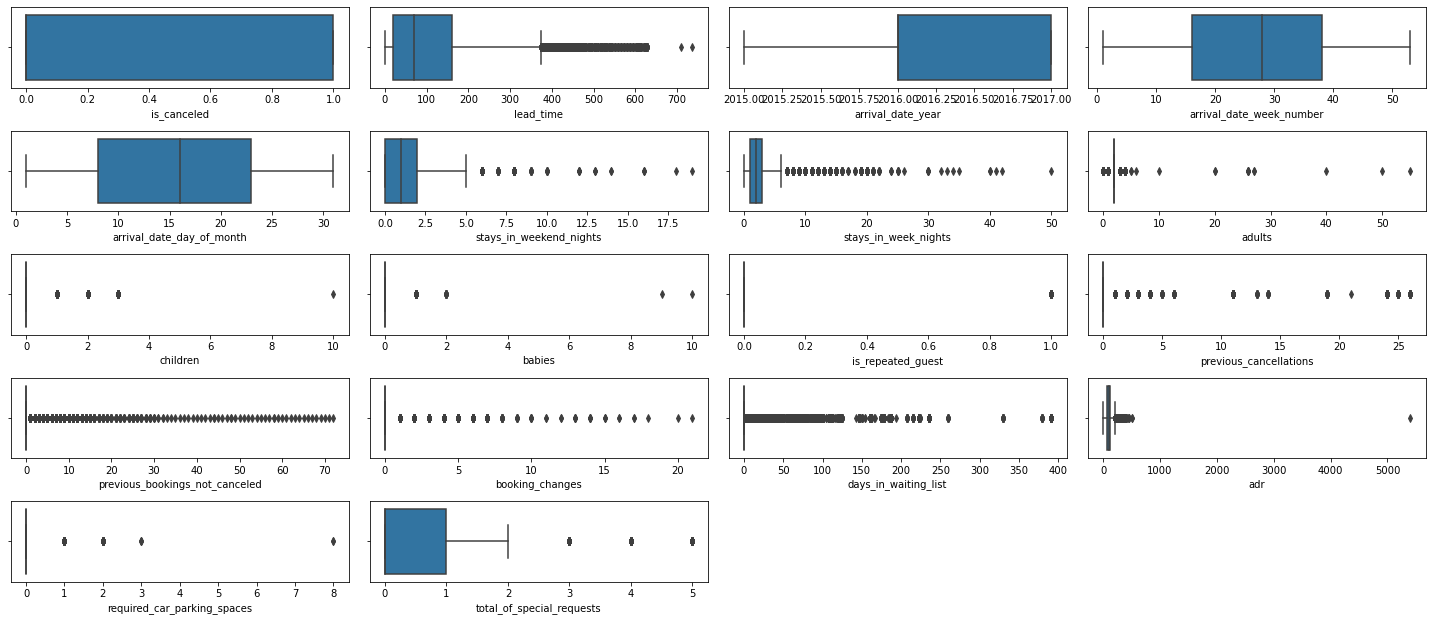

In [619]:
# Now there is no null values in the data, so will check for outliers.

plt.figure(figsize = (20, 10))
x = 1 

for column in df.describe().columns:
    plt.subplot(6,4,x)
    sns.boxplot(df[column])
    x+=1
    
plt.tight_layout()

# we can see that there are many outliers in many of the columns 
# and from the box plot there are columns that has a random value like 0 number of adults 
# and negative amount of adr 
# there's one value of adr that's above 5000 and there's only 1 data point since it so random we will drop that one outliers i
# since this data comes from both region and knowing the avg ADR is less than 5000 we will be dropping the row that has more than
# 5000 euro ADR

In [620]:
# since it's impossible to have 0 adults to book a hotel room , we will drop all row with adults having 0 count

df.drop(labels = df[df['adults'] == 0].index, axis = 0, inplace = True)
df[df['adults'] == 0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


In [621]:
# there are a value of a adr columns that below 0 since it is impossible for hotel to owe money to the guest 
df[df['adr'] <0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
14969,Resort Hotel,0,195,2017,March,10,5,4,6,2,0.0,0,BB,GBR,Groups,Direct,1,0,2,A,H,2,No Deposit,0,Transient-Party,-6.38,0,0,Check-Out,2017-03-15


In [622]:
# dropping adr rows, since adr cannot be negative
df = df.drop(df[df.adr < 0].index)
df[df['adr'] < 0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


In [623]:
# dropping adr rows having value greater than 5000
df = df.drop(df[df.adr > 5000].index)
df[df['adr']> 5000]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


### Data Preparation

In [624]:
# getting booking Arrival date as Date time object

df['arrival_date'] = df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'] + '-' + df['arrival_date_day_of_month'].astype(str)
df['arrival_date'] = pd.to_datetime(df['arrival_date'])

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01


In [625]:
# getting arrival month 

df['arrival_month'] = df['arrival_date'].dt.month
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_month
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,7


In [626]:
# getting arrival day

df['arrival_day'] = df['arrival_date'].dt.day_name()
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_month,arrival_day
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,7,Wednesday


In [627]:
df['month_year'] = pd.to_datetime(df['arrival_date']).dt.to_period('M')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_month,arrival_day,month_year
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015-07
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015-07
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,7,Wednesday,2015-07


In [628]:
# getting the total stays column by adding the weekday stays and the weekend stays

df['total_stays'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_month,arrival_day,month_year,total_stays
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015-07,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015-07,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,7,Wednesday,2015-07,2


In [629]:
# this is a little randomness of the data as well since you won't be able to make a booking at the arrival date and checkout on 
# the same day
# many OTA (booking.com, traveloka won't allow you to do this however hilton hotel allow you to do this )
# so we will keep the data instead of dropping it 

df[df['total_stays'] == 0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_month,arrival_day,month_year,total_stays
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07,0
167,Resort Hotel,0,111,2015,July,28,6,0,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,H,0,No Deposit,0,Transient,0.0,0,2,Check-Out,2015-07-06,2015-07-06,7,Monday,2015-07,0
168,Resort Hotel,0,0,2015,July,28,6,0,0,1,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,H,0,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-06,2015-07-06,7,Monday,2015-07,0
196,Resort Hotel,0,8,2015,July,28,7,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,0,Transient,0.0,0,1,Check-Out,2015-07-07,2015-07-07,7,Tuesday,2015-07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115483,City Hotel,0,15,2017,July,27,6,0,0,1,0.0,0,SC,FRA,Direct,Direct,0,0,0,A,A,0,No Deposit,0,Transient-Party,0.0,0,0,Check-Out,2017-07-06,2017-07-06,7,Thursday,2017-07,0
117701,City Hotel,0,0,2017,August,32,8,0,0,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,1,0,0,A,A,0,No Deposit,0,Transient,0.0,0,0,Check-Out,2017-08-08,2017-08-08,8,Tuesday,2017-08,0
118029,City Hotel,0,0,2017,August,33,14,0,0,2,0.0,0,BB,PRT,Direct,Direct,1,0,0,A,A,0,No Deposit,0,Transient,0.0,0,0,Check-Out,2017-08-14,2017-08-14,8,Monday,2017-08,0
118631,City Hotel,0,78,2017,August,34,23,0,0,1,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,K,7,No Deposit,0,Transient-Party,0.0,0,0,Check-Out,2017-08-23,2017-08-23,8,Wednesday,2017-08,0


In [630]:
# we want to see the total guest of the booking by combining the value of adults children and babies 
# adding the kids in the booking by combiing the children and the babies, 
# because majority of the bookings sites there's no babies option as well
# total guest of the hotel booking by adding the babies children and babies

df['guests'] = df['adults'] + df['children'] + df['babies']
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_month,arrival_day,month_year,total_stays,guests
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07,0,2.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07,0,2.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015-07,1,1.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015-07,1,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,7,Wednesday,2015-07,2,2.0


In [631]:
df['kids'] = df['children'] + df['babies']
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_month,arrival_day,month_year,total_stays,guests,kids
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07,0,2.0,0.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07,0,2.0,0.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015-07,1,1.0,0.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015-07,1,1.0,0.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,7,Wednesday,2015-07,2,2.0,0.0


In [632]:
# we can see from here that there's an undefined value from the dataset 
# however from the explanation from the source of the dataset that undifed meal package is same as SC (No Meal Package)
# so we will replcae the undefined to SC

df['meal'].unique()
 

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [633]:
df['meal'] = df['meal'].str.replace('Undefined', 'SC')
df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC'], dtype=object)

In [634]:
# now lets check all the columns description and all the columns boxplot before we moving on to the exploratory data analysis

df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,118985.0,0.370753,0.483008,0.0,0.0,0.0,1.0,1.0
lead_time,118985.0,104.070353,106.891161,0.0,18.0,69.0,160.0,737.0
arrival_date_year,118985.0,2016.156356,0.707743,2015.0,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,118985.0,27.164407,13.598771,1.0,16.0,28.0,38.0,53.0
arrival_date_day_of_month,118985.0,15.796781,8.781164,1.0,8.0,16.0,23.0,31.0
stays_in_weekend_nights,118985.0,0.926932,0.995235,0.0,0.0,1.0,2.0,19.0
stays_in_week_nights,118985.0,2.499029,1.897747,0.0,1.0,2.0,3.0,50.0
adults,118985.0,1.862689,0.570064,1.0,2.0,2.0,2.0,55.0
children,118985.0,0.100433,0.390219,0.0,0.0,0.0,0.0,10.0
babies,118985.0,0.007951,0.097474,0.0,0.0,0.0,0.0,10.0


In [635]:
# since we have columns that that's have almost similar value like children babies, now is combined into kids
# stays in weekend nights and stays in week nights now combined into total stays
# we will be dropping both columns 

df = df.drop(columns = ['stays_in_weekend_nights', 'stays_in_week_nights', 'babies', 'children'])
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_month,arrival_day,month_year,total_stays,guests,kids
0,Resort Hotel,0,342,2015,July,27,1,2,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07,0,2.0,0.0
1,Resort Hotel,0,737,2015,July,27,1,2,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07,0,2.0,0.0
2,Resort Hotel,0,7,2015,July,27,1,1,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015-07,1,1.0,0.0
3,Resort Hotel,0,13,2015,July,27,1,1,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015-07,1,1.0,0.0
4,Resort Hotel,0,14,2015,July,27,1,2,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,7,Wednesday,2015-07,2,2.0,0.0


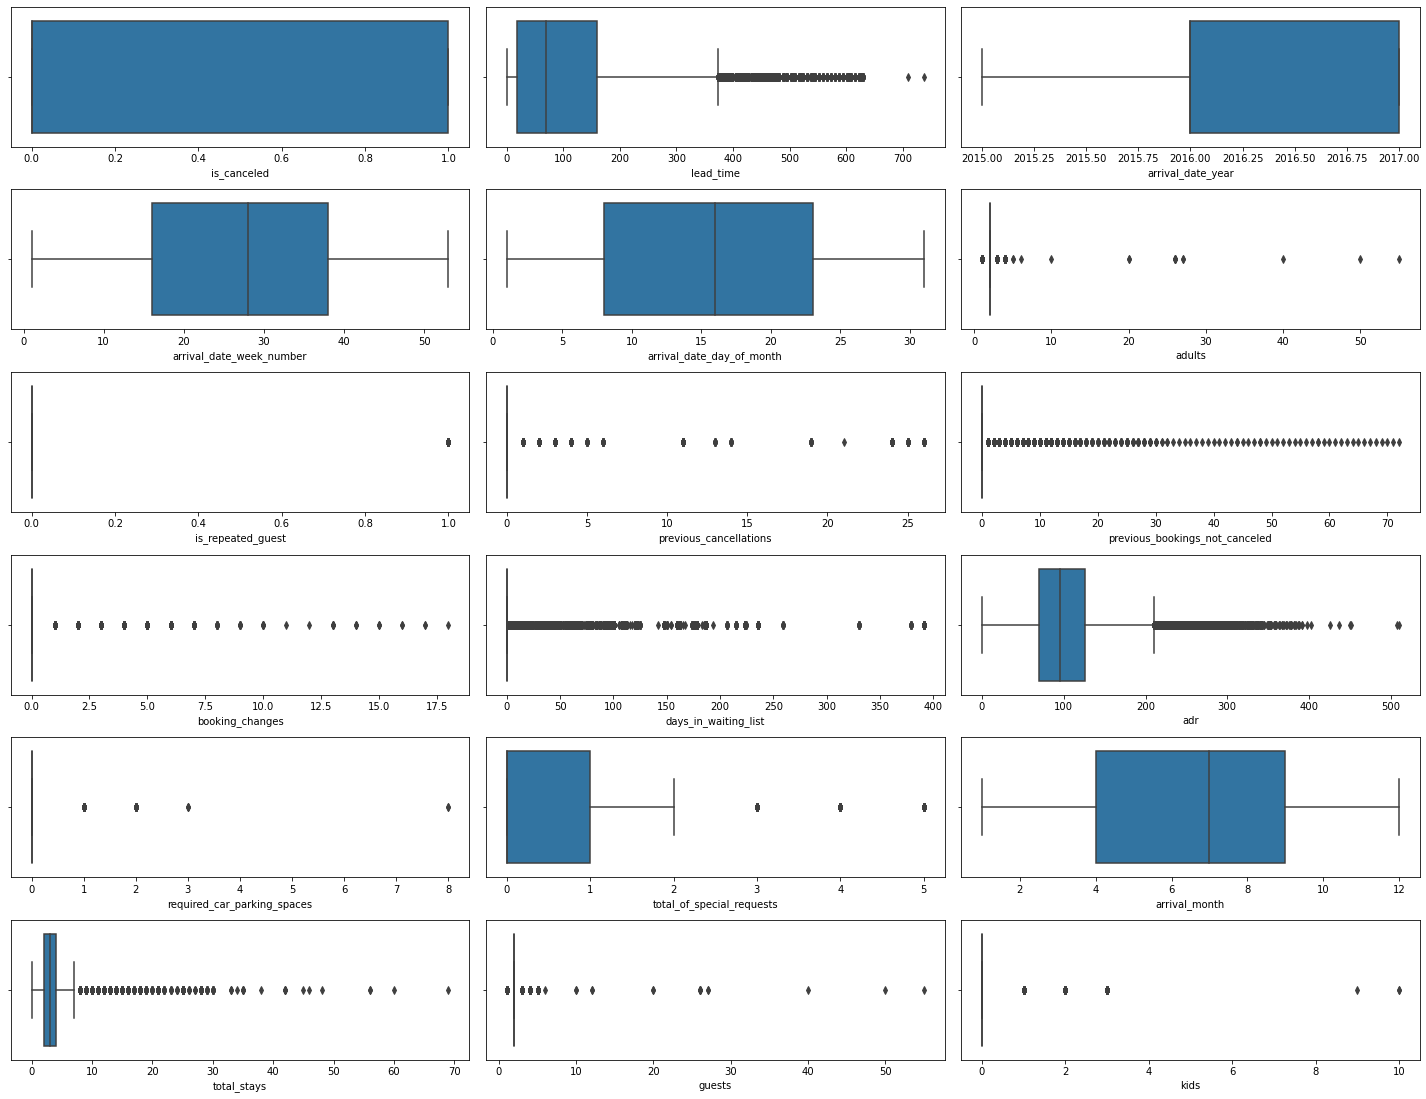

In [636]:
# as we can see that there are still many outliers in many of the columns 
# we are not going to drop the outliers here as outliers could provide many useful information 
# we will bin in but and create new column and hopefully we will be able to extract some more information by doing that 

plt.figure(figsize = (20, 20))
x = 1 

for column in df.describe().columns:
    plt.subplot(8,3,x)
    sns.boxplot(df[column])
    x+=1
    
plt.tight_layout()

In [637]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,118985.0,0.370753,0.483008,0.0,0.0,0.0,1.0,1.0
lead_time,118985.0,104.070353,106.891161,0.0,18.0,69.0,160.0,737.0
arrival_date_year,118985.0,2016.156356,0.707743,2015.0,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,118985.0,27.164407,13.598771,1.0,16.0,28.0,38.0,53.0
arrival_date_day_of_month,118985.0,15.796781,8.781164,1.0,8.0,16.0,23.0,31.0
adults,118985.0,1.862689,0.570064,1.0,2.0,2.0,2.0,55.0
is_repeated_guest,118985.0,0.031542,0.174777,0.0,0.0,0.0,0.0,1.0
previous_cancellations,118985.0,0.087339,0.845700,0.0,0.0,0.0,0.0,26.0
previous_bookings_not_canceled,118985.0,0.137328,1.499529,0.0,0.0,0.0,0.0,72.0
booking_changes,118985.0,0.218507,0.638068,0.0,0.0,0.0,0.0,18.0


## Exploratory Data Analysis

In [638]:
# as we know from the cleaning process before that our data has a lot of outliers in it we will try to bin them and not dropping them 

df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,adults,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,arrival_month,total_stays,guests,kids
count,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000
mean,0.370753,104.070353,2016.156356,27.164407,15.796781,1.862689,0.031542,0.087339,0.137328,0.218507,2.325604,101.964460,0.062655,0.570652,6.552381,3.425961,1.971072,0.108383
std,0.483008,106.891161,0.707743,13.598771,8.781164,0.570064,0.174777,0.845700,1.499529,0.638068,17.614343,48.053329,0.245546,0.792403,3.089348,2.541649,0.719446,0.404480
min,0.000000,0.000000,2015.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.500000,0.000000,0.000000,4.000000,2.000000,2.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,7.000000,3.000000,2.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,9.000000,4.000000,2.000000,0.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,55.000000,1.000000,26.000000,72.000000,18.000000,391.000000,510.000000,8.000000,5.000000,12.000000,69.000000,55.000000,10.000000


In [639]:
df.describe(include = 'O')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,arrival_day
count,118985,118985,118985,118985,118985,118985,118985,118985,118985,118985,118985,118985,118985
unique,2,12,4,177,8,5,9,11,3,4,3,926,7
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21,Friday
freq,78939,13829,92018,48917,56221,97559,85861,73982,104237,89336,74871,1460,19556


## Univariate Analysis

In [640]:
# as we mentioned before that there are more booking from the city hotel compared to the resort hotel in this case 
# we will se it later on how this affect cancellation 

df.stb.freq(['hotel'], cum_cols=False)

,hotel,count,percent
0,City Hotel,78939,66.343657
1,Resort Hotel,40046,33.656343


In [641]:
# this cancellation rate is somehow similar to the industry standard around 37 % - 40 %
# this is the problem that hospitality industy is facing there are almost 4 cancellation in every 10 bookings 
# this data is  almost balance, so later on for the machine learning process we wont need to do an imbalance handling 

df.stb.freq(['is_canceled'], cum_cols = False)

,is_canceled,count,percent
0,0,74871,62.924738
1,1,44114,37.075262


In [642]:
# Since the're are many unique values in the lead time we will group it into months 
# before we do analysis on those so hopefully we can see a trend from binning lead time into months
# we can see that, here majority of the booking were made during the same month as the planned arrival 
# however there are some booking that's made a year or more ahead before the arrival 
# and we will see how this longer period of lead time affecting cancellation rate 

lead_time_months = df['lead_time'] // 30
lead_time_months.value_counts() / len(df)
df['lead_time_month'] = df['lead_time'] // 30

In [643]:
df.stb.freq(['lead_time_month'], cum_cols = False)

,lead_time_month,count,percent
0,0,37879,31.835105
1,1,17140,14.405177
2,2,12697,10.671093
3,3,10453,8.785141
4,4,8046,6.762197
5,5,7891,6.631928
6,6,5699,4.789679
7,7,4354,3.659285
8,9,3441,2.891961
9,8,3420,2.874312


In [644]:
# as we can see from the table below that Travel Agent or Tour Operator is the biggest booking distribution channel 
# compared to other channel while direct is the second most biggest distribution channel
# we will treat the undefined values as TA / TO

df.stb.freq(['distribution_channel'], cum_cols= False) 

,distribution_channel,count,percent
0,TA/TO,97559,81.992688
1,Direct,14577,12.251124
2,Corporate,6651,5.589780
3,GDS,193,0.162205
4,Undefined,5,0.004202


In [645]:
df['distribution_channel'] =  df['distribution_channel'].str.replace('Undefined', 'TA/TO')

In [646]:
df.stb.freq(['distribution_channel'], cum_cols= False)

,distribution_channel,count,percent
0,TA/TO,97564,81.996890
1,Direct,14577,12.251124
2,Corporate,6651,5.589780
3,GDS,193,0.162205


In [647]:
# the market segment is almost similar to the distribution channel 
# however we see that there are more categories in this column compared to the distribution channel 
# we see from here that travel agent (online and offline) market segment dominating the booking compared to other market segment
# there are aa couple of undefined values as well we will replace it with mode here in this case is 'Online TA'
# this is because of imputing the random value with the most frequent value in the column

df.stb.freq(['market_segment'], cum_cols = False)

,market_segment,count,percent
0,Online TA,56221,47.250494
1,Offline TA/TO,24178,20.320208
2,Groups,19790,16.632349
3,Direct,12553,10.550069
4,Corporate,5282,4.439215
5,Complementary,724,0.608480
6,Aviation,235,0.197504
7,Undefined,2,0.001681


In [648]:
# how we have replace the undefined value in the column

df['market_segment'] = df['market_segment'].replace('Undefined', 'Online TA')
df.stb.freq(['market_segment'], cum_cols = False)

,market_segment,count,percent
0,Online TA,56223,47.252175
1,Offline TA/TO,24178,20.320208
2,Groups,19790,16.632349
3,Direct,12553,10.550069
4,Corporate,5282,4.439215
5,Complementary,724,0.608480
6,Aviation,235,0.197504


In [649]:
# bed and breakfast is the most popular meal package compared to the rest of the meal package 
# while full board is the least popular meal package compared to the rest of the meal package (included breakfast, lunch , dinner )

df.stb.freq(['meal'], cum_cols=False)

,meal,count,percent
0,BB,92018,77.335799
1,HB,14454,12.147750
2,SC,11715,9.845779
3,FB,798,0.670673


In [650]:
# almost half of the booking is made from portugal (this is kind of make sense since the both of the hotel is in portugal)
# since that there's so many unique values from all the countries where the booking comes from we will try to group it into continent
# or we will group it into booking from portugal and booking from outside portugal since both of the hotel are in portugal
# it's kind of make sense to split the booking into international booking or local booking 

df.stb.freq(['country'], cum_cols = False).head(10)

,country,count,percent
0,PRT,48917,41.111905
1,GBR,12104,10.172711
2,FRA,10376,8.720427
3,ESP,8546,7.182418
4,DEU,7271,6.110854
5,ITA,3752,3.153339
6,IRL,3370,2.832290
7,BEL,2326,1.954868
8,BRA,2212,1.859058
9,NLD,2094,1.759886


In [651]:
# the goals of creating a new column here so later on we can see how booking location affecting cancellation

def country(row):
    if (row['country'] == 'PRT'):
        return 'Local'
    else :
        return 'International'
    
df['booking_location'] = df.apply(country, axis = 1)

df.stb.freq(['booking_location'], cum_cols=False)


,booking_location,count,percent
0,International,70068,58.888095
1,Local,48917,41.111905


In [652]:
# as from our df.describe(include = 'O') we saw that room A is the most popular room in the bookings 
# we will figure out later why, our assumption for now is room A is the cheapest room in the booking 
# compared to any other rooms

df.stb.freq(['reserved_room_type'], cum_cols = False)



,reserved_room_type,count,percent
0,A,85861,72.161197
1,D,19178,16.117998
2,E,6518,5.478001
3,F,2892,2.430558
4,G,2091,1.757364
5,C,931,0.782452
6,B,907,0.762281
7,H,601,0.505106
8,L,6,0.005043


In [653]:
# as we mentioned before that the No deposit type is the most popular compared to other deposit type in this booking in portugal 
# this might be the reason why the cancellation in the industry has been on a rise
# the flexibility that's given to the customer to book hotel without any deposit

df.stb.freq(['deposit_type'], cum_cols = False)


,deposit_type,count,percent
0,No Deposit,104237,87.605160
1,Non Refund,14586,12.258688
2,Refundable,162,0.136152


In [654]:
# from this table below we see that there are only 3.1 % of repeated guest from this booking 
# this might be affecting the cancellation of the hotel from the low rate of loyal customers 
# we will deep dive into this later on 

df.stb.freq(['is_repeated_guest'], cum_cols = False)

,is_repeated_guest,count,percent
0,0,115232,96.845821
1,1,3753,3.154179


In [655]:
# almost 95% of the booking never been cancelled before in this data set
# we will group this into booking that's never been cancelled or have been cancelled before

df.stb.freq(['previous_cancellations'], cum_cols = False)

,previous_cancellations,count,percent
0,0,112508,94.556457
1,1,6046,5.081313
2,2,114,0.095810
3,3,65,0.054629
4,24,48,0.040341
5,11,35,0.029415
6,4,31,0.026054
7,26,26,0.021851
8,25,25,0.021011
9,6,22,0.018490


In [656]:
def cancellation(row):
    if (row['previous_cancellations'] == 0):
        return 0
    else :
        return 1

df['is_previously_cancelled'] = df.apply(cancellation, axis = 1)
df.stb.freq(['is_previously_cancelled'], cum_cols = False)

,is_previously_cancelled,count,percent
0,0,112508,94.556457
1,1,6477,5.443543


In [657]:
# almost 85 % of the customers never change their booking 
# since there are many values of this booking changes column 
# we will group it in to does the booking ever been changes or not 

df.stb.freq(['booking_changes'], cum_cols = False)

,booking_changes,count,percent
0,0,101066,84.940119
1,1,12620,10.606379
2,2,3773,3.170988
3,3,910,0.764802
4,4,367,0.308442
5,5,114,0.095810
6,6,61,0.051267
7,7,28,0.023532
8,8,14,0.011766
9,9,8,0.006724


In [658]:
def changes(row):
    if (row['booking_changes'] == 0):
        return 0
    else :
        return 1

df['is_booking_changes'] = df.apply(changes, axis = 1)
df.stb.freq(['is_booking_changes'], cum_cols = False)

,is_booking_changes,count,percent
0,0,101066,84.940119
1,1,17919,15.059881


In [659]:
# more than half of the customers don't have any special request when they book
# we will see later if special request has an effect on the cancellation

df.stb.freq(['total_of_special_requests'], cum_cols = False)

,total_of_special_requests,count,percent
0,0,70131,58.941043
1,1,33085,27.806026
2,2,12911,10.850948
3,3,2480,2.084296
4,4,338,0.284069
5,5,40,0.033618


In [660]:
df.stb.freq(['customer_type'], cum_cols = False)

# majority of the booking  customer here are transient (individual booking /personal not related to company or anything )
# we will see how this customer type affecting the cancellation rate as well


,customer_type,count,percent
0,Transient,89336,75.081733
1,Transient-Party,25005,21.015254
2,Contract,4071,3.421440
3,Group,573,0.481573


In [661]:
# 3 times of july and August
#  while the rest of the month year only appear twice 
# since this data is from July 2015 - August 2017

# using the percentage here wouldn't be so reliable since there are months that appear more than some months 

df.stb.freq(['arrival_date_month'], cum_cols = False)

,arrival_date_month,count,percent
0,August,13829,11.622473
1,July,12611,10.598815
2,May,11764,9.886961
3,October,11131,9.354961
4,April,11057,9.292768
5,June,10917,9.175106
6,September,10489,8.815397
7,March,9749,8.193470
8,February,8034,6.752112
9,November,6765,5.685591


In [662]:
df.stb.freq(['arrival_day'], cum_cols = False)

# we see from here that booking for arrivalf day on Friday and Thursday has the higest percentage among all the other day 
# while Booking for the arrival day of Sunday and Tuesday has the lowest percentage 
# we will try to see this  with the number of cancellation 

,arrival_day,count,percent
0,Friday,19556,16.435685
1,Thursday,19187,16.125562
2,Monday,18127,15.234693
3,Saturday,18002,15.129638
4,Wednesday,16074,13.509266
5,Sunday,14090,11.841829
6,Tuesday,13949,11.723326


## Multivariate Analysis

**Since our goals is to findout what leads into high cancellation by looking at the characteristic of the customer and the pattern of cancelled booking, our multivariate analysis will centered around that process**

In [663]:
from IPython.core.display import display, HTML

def display_side_by_side(dfs:list, captions:list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0\xa0\xa0"
    display(HTML(output))

In [664]:
# we see that city hotels booking are more likely to be cancelled compared to the resort hotel in this booking dataset 
# we will make an assumption here with the increase numbers of booking the increase the number of booking cancellation 
# (postively correlated)

pd.crosstab(df['hotel'], df['is_canceled'], normalize = 'index')

df.stb.freq(['hotel'], cum_cols = False)

display_side_by_side([pd.crosstab(df['hotel'], df['is_canceled'], normalize = 'index'), df.stb.freq(['hotel'], cum_cols = False)],['Cancelation', 'Number of Bookings'])



In [665]:
# how does lead time affect cancellation does a longer lead time will result in higher chances of cancellation, for this analysis we have group the lead time into month ( assuming 1 month is 30 days)

pd.crosstab(df['lead_time_month'], df['is_canceled'], normalize = 'index')

# from the crosstab below we see that leadtime in general has a linear effect towards cancellation 
# it means in general that the longer lead time has a higher cancellation rate compared to the shorter one 

# bookings that has more than 7 months lead time are more likely to be canceled compared to confirmed 

is_canceled,0,1
lead_time_month,,
0,0.817498,0.182502
1,0.636173,0.363827
2,0.602189,0.397811
3,0.558978,0.441022
4,0.563510,0.436490
5,0.538081,0.461919
6,0.551851,0.448149
7,0.531465,0.468535
8,0.448830,0.551170


In [666]:
# the cancellation rate goes down about 1.2 % from in 2016
# however the cancellation rate goes up 1.9 % in 2017 to 38. 7 % 

# that cancellation rate are almost similar to industry standard reported in 2018 reported there are 40 % of cancellation of bookings
# source :
# https://www.emerchantpay.com/infographic-how-can-hotels-combat-rising-cancellation-rates/

# however both the 2015 and 2017 only have the half of the year so this result may not represent the actual
# cancelation for both 2015 and 2017

pd.crosstab(df['arrival_date_year'], df['is_canceled'], normalize = 'index')

is_canceled,0,1
arrival_date_year,,
2015,0.629373,0.370627
2016,0.641004,0.358996
2017,0.612807,0.387193


In [667]:
# there's definitely fluctuation in term of arrival month and cancellation 
# with the highest cancellation month are in 
# 1. June (41.5 %)
# 2. April (40.8 %)
# 3. May (39. 6 %)

# those months are summer months 
# according to :
# https://www.timeanddate.com/holidays/portugal/2017

# those 3 months combined to total of 18 days of holidays and observance in 2017
# 15 days in 2016 
# 14 days in 2015 

# plus june is a school holiday in portugal

# that's might be the reason why on those month cancelation is higher compared to the other months

pd.crosstab(df['arrival_date_month'], df['is_canceled'], normalize = 'index').sort_values(1, ascending = False)


is_canceled,0,1
arrival_date_month,,
June,0.584959,0.415041
April,0.592114,0.407886
May,0.603111,0.396889
September,0.608352,0.391648
October,0.618722,0.381278
August,0.622098,0.377902
July,0.625169,0.374831
December,0.649792,0.350208
February,0.665546,0.334454


In [668]:
# we can see below it shows that booking that has more than 4 adults registered in a single booking is always been canceled

pd.crosstab(df['adults'], df['is_canceled'], normalize = 'index').sort_values(1, ascending = False)

is_canceled,0,1
adults,,
5,0.000000,1.000000
6,0.000000,1.000000
10,0.000000,1.000000
20,0.000000,1.000000
26,0.000000,1.000000
27,0.000000,1.000000
40,0.000000,1.000000
50,0.000000,1.000000
55,0.000000,1.000000


In [669]:
# it seems that the number of kids in the booking doesn't really have any correlation towards cancellation

pd.crosstab(df['kids'], df['is_canceled'], normalize = 'index')

is_canceled,0,1
kids,,
0.0,0.627407,0.372593
1.0,0.691841,0.308159
2.0,0.587609,0.412391
3.0,0.731959,0.268041
9.0,1.000000,0.000000
10.0,0.500000,0.500000


In [670]:
# for guests columns it's almost similar like the adults columns however there are confirmed booking

pd.crosstab(df['guests'], df['is_canceled'], normalize = 'index') 

is_canceled,0,1
guests,,
1.0,0.709660,0.290340
2.0,0.603013,0.396987
3.0,0.678180,0.321820
4.0,0.581064,0.418936
5.0,0.751825,0.248175
6.0,0.000000,1.000000
10.0,0.500000,0.500000
12.0,0.500000,0.500000
20.0,0.000000,1.000000


In [671]:
# out of all meal package, booking that's with full board meal (breakfast, lunch, dinner are more likely to cancel compared to )
# booking with other meal package

# while the other meal package has cancellation around 34 - 37 % 

pd.crosstab(df['meal'], df['is_canceled'], normalize = 'index')


is_canceled,0,1
meal,,
BB,0.625932,0.374068
FB,0.401003,0.598997
HB,0.655251,0.344749
SC,0.638754,0.361246


In [672]:
# it's suprising that booking that's made in portugal are almost 2.5 X more likely to be cancelled compared to booking
# that's made outside portugal 
# we will do deeper analysis why booking in portugal are more likely to be canceled compared to the international booking 

pd.crosstab(df['booking_location'], df['is_canceled'], normalize = 'index')


is_canceled,0,1
booking_location,,
International,0.763601,0.236399
Local,0.436801,0.563199


In [673]:

# we see here that group market segment has a higher cancel rate compared to it's confirmed rate 
# next to it iss travel agent (online) and offline has almost a similar number in term of cancellation rate
# the lowest cancellation rate is direct booking (we exclude complimentary since it's complimentary)

pd.crosstab(df['market_segment'], df['is_canceled'], normalize = 'index')


is_canceled,0,1
market_segment,,
Aviation,0.778723,0.221277
Complementary,0.878453,0.121547
Corporate,0.812382,0.187618
Direct,0.846491,0.153509
Groups,0.388883,0.611117
Offline TA/TO,0.656713,0.343287
Online TA,0.632499,0.367501


In [674]:
# Travel Agent / Tour Operators has the highest cancellation rate among all the distribution channel 
# while direct has the lowest cancellation rate 

pd.crosstab(df['distribution_channel'], df['is_canceled'], normalize = 'index')


is_canceled,0,1
distribution_channel,,
Corporate,0.779432,0.220568
Direct,0.825273,0.174727
GDS,0.808290,0.191710
TA/TO,0.589367,0.410633


In [675]:
# booking that has changes are less likely to be cancelled compared to the booking that's never been changed(original booking)

pd.crosstab(df['is_booking_changes'], df['is_canceled'], normalize = 'index')

is_canceled,0,1
is_booking_changes,,
0,0.591376,0.408624
1,0.842848,0.157152


In [676]:
pd.crosstab(df['is_previously_cancelled'], df['is_canceled'], normalize = 'index')

# booking that's previously cancelled are 92% will be cancelled again
# this tell us that booking that's been cancelled are more likely to be cancelled again

is_canceled,0,1
is_previously_cancelled,,
0,0.660682,0.339318
1,0.083218,0.916782


In [677]:
# majority of the booking in this dataset has no deposit policy this gave flexibilty to the customers to cancel with ease whenever based on their liking without having to deal with any loss, however there are implication from customers who cancel

pd.crosstab(df['deposit_type'], df['is_canceled'], normalize = 'index')


# as we can see that non refundable deposit has the highest cancellation rate among all deposit type 
# so the hotel somehow already protect themselves from losing out on revenue by implementing the non refund deposit 

# we will look into this deeper why does Non Refund policy have the highest cancellation rate among all bookings ?

is_canceled,0,1
deposit_type,,
No Deposit,0.716176,0.283824
Non Refund,0.006376,0.993624
Refundable,0.777778,0.222222


In [678]:
#how does numbers of special requests in a booking affect a cancellation rate of a booking

pd.crosstab(df['total_of_special_requests'], df['is_canceled'], normalize = 'index')

#the numbers of special request has a negative correlation  with cancellation we see that the higher the number of the total 
#special request the lower the cancellation rate, means here that customers who booked and requested a lot of stuff are
# more like like not to canceled compared to customer who did not have special requests 

# the assumption here is booking with more special request are likely customers who has a special needs 
# from dietary restriction (vegan, vegetarian, etc) or special request for room type (smoking) and another requests

is_canceled,0,1
total_of_special_requests,,
0,0.522308,0.477692
1,0.779810,0.220190
2,0.779335,0.220665
3,0.822177,0.177823
4,0.893491,0.106509
5,0.950000,0.050000


In [679]:
#does the number of required parking space has an effect on the number of cancellation?

pd.crosstab(df['required_car_parking_spaces'], df['is_canceled'], normalize='index')


# here shows that customer who need a parking spot for their vehicle actually never cancelled their hotel booking,
# this could be a good insight for the hotel interm of marketing 
# the hotel could promote anything that makes people who vehicle life easier, eg(free valet, free charging for electric car, and free parking)
# since there're no cancellation for people who drives to the hotel attracting more of them is not a bad idea at all

is_canceled,0,1
required_car_parking_spaces,,
0,0.604635,0.395365
1,1.000000,0.000000
2,1.000000,0.000000
3,1.000000,0.000000
8,1.000000,0.000000


In [680]:
def parking(row):
    if (row['required_car_parking_spaces'] < 1):
        return 0
    else :
        return 1
    
df['parking_space'] = df.apply(parking, axis = 1)
df.stb.freq(['parking_space'], cum_cols = False)

# we want simplified into 2 segment booking that require parking space and booking that doesn't require a parking space 
# we that from here only 6.2 percent of the booking that require parking space

,parking_space,count,percent
0,0,111578,93.774846
1,1,7407,6.225154


**We have looked at comparison at each independent variable to dependent variable, we want to compare multiple independet varibale to dedpendent variable or independet variable to another independet variable**

In [681]:
# we that from here that the median lead time of cancelled booking in both hotel are 
# longer compared to confirmed booking 
# the median lead time for cancelled booking in both hotel are around 3 months
# while for confirmed booking are around 1 month 

# we use median here instead of mean because of there are outliers in this columns 

pd.crosstab(df['hotel'], df['is_canceled'], values = df['lead_time'], aggfunc = 'median')

is_canceled,0,1
hotel,,
City Hotel,50,115
Resort Hotel,38,109


In [682]:
# the reason why median is used is because there are many outliers in the adr columns 
# for city hotel wee see that the median adr for cancelled and confirmed booking is the same 
# while for resort hotel the median adr for cancelled booking is slightly higher compared to confirmed booking

pd.crosstab(df['hotel'], df['is_canceled'], values = df['adr'], aggfunc = 'median')

is_canceled,0,1
hotel,,
City Hotel,100.0,99.9
Resort Hotel,72.0,84.0


In [683]:
## resort hotel has higher confirmed booking in any meal category, compared to city hotel, while Full board meal package seems 
# to be the meal package with the highest cancellation rate in both hotel 

pd.crosstab([df['hotel'],df['meal']], df['is_canceled'], normalize = 'index')

is_canceled               0         1
hotel        meal                    
City Hotel   BB    0.571433  0.428567
             FB    0.204545  0.795455
             HB    0.619850  0.380150
             SC    0.623245  0.376755
Resort Hotel BB    0.738584  0.261416
             FB    0.412467  0.587533
             HB    0.683445  0.316555
             SC    0.769293  0.230707

In [684]:
#from our analysis before we see that group booking has the highest cancellation rate among all market segment, higher cancellation rate compared to it's confirmed rate might cause the hotel loss if group booking has no deposit, deposit policy now we want to take a look deposit type for each market segment

pd.crosstab(df['market_segment'], df['deposit_type'], normalize = 'index')

## we see thath more that hald of the group booking still made with no deposit 
# for future protection of the hotel (since group cancellation rate is at 61%, all group booking should be with( no refund) policy
# or refundable (with charges) deposit policy

# online travel agent has the 2nd highest cancellation rate among all market segment, and we can see here almost all of the
# booking that's made through online travel agent are with no deposit (deposit type)

# suggestion :
# Online travel agent is one of the distribution channel / market segment, the hotel still have the full control in determining
# what kind of deposit policy that want to be implemented in the online travel agency 
# in this case the channel manager should split up the deposit type for Online Travel Agent Market Segment

deposit_type,No Deposit,Non Refund,Refundable
market_segment,,,
Aviation,1.000000,0.000000,0.000000
Complementary,1.000000,0.000000,0.000000
Corporate,0.936009,0.063234,0.000757
Direct,0.998008,0.001514,0.000478
Groups,0.529965,0.463466,0.006569
Offline TA/TO,0.792828,0.207006,0.000165
Online TA,0.998684,0.000996,0.000320


In [685]:
#from our analysis we see that 92 % of booking that has been canceled before will be cancelled again we want to see how's the deposit type of those bookings

pd.crosstab(df['is_previously_cancelled'], df['deposit_type'], normalize = 'index')

# we see that for the customer that has cancelled before more than half of the booking are in non refund (deposit type)
# however there are still more than 43% no deposit (deposit type) for booking that's been canceled before 

# as from our previous analysis that 92% of booking that's previously cancelled will be cancelled again
# my suggestion here is that only non refund booking or refundable booking ( with charges) deposit type 
# for customer who had cancelled their previous booking 

deposit_type,No Deposit,Non Refund,Refundable
is_previously_cancelled,,,
0,0.901323,0.097238,0.00144
1,0.437085,0.562915,0.00000


In [686]:
#we want to know where does all previous cancellation booking comes from

pd.crosstab(df['is_previously_cancelled'], df['market_segment'], normalize = 'index')

# more than half ofthe booking that're previously cancelled are form group booking 

market_segment,Aviation,Complementary,Corporate,Direct,Groups,Offline TA/TO,Online TA
is_previously_cancelled,,,,,,,
0,0.002009,0.005848,0.041828,0.109921,0.146141,0.200012,0.49424
1,0.001390,0.010190,0.088930,0.028717,0.516906,0.258607,0.09526


In [687]:
#During our analysis we see that lead time have a somehow positive correlation with the cancellation the higher the lead time
#the more likely a guest will canceled, in this segment we want to see the median / the average lead time for each deposit 
#type and how it might lead into cancellation rate for each deposit type

pd.crosstab(df['deposit_type'], 'Median Lead Time', values = df['lead_time'], aggfunc = 'median')

# this might be the reason why non refund has the highest cancellation because of the longer lead time
# from our analysis before we see that the longer the lead time the higher the chances of cancellation happening 
# as we can see from the table below Non Refund Booking Has the highest median lead time 

col_0,Median Lead Time
deposit_type,
No Deposit,56
Non Refund,183
Refundable,169


In [688]:
#One of the hospitality technique to sell a room with non refund policy and longer lead time is selling them for cheaper compared to no deposit policy, 
#but you’re likely to make up the small price difference by getting more guaranteed bookings and higher overall revenue

pd.crosstab(df['deposit_type'], 'Median ADR', values = df['adr'], aggfunc = 'median')

# apparently our assumption is different compared to the real data 
# we see that the median price for refundable  booking is the lowest compared to the other deposit type

col_0,Median ADR
deposit_type,
No Deposit,95.67
Non Refund,86.00
Refundable,66.00


### Data Visualisation

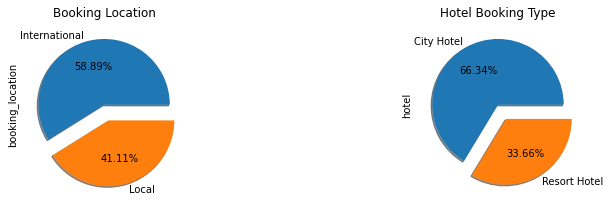

In [689]:
# where are all the the bookings comes from 

plt.figure(figsize = (10, 5))
plt.subplot(1,3,1)
df['booking_location'].value_counts().plot.pie(explode = [0, 0.25], 
                                               autopct = '%1.2f%%',
                                               shadow = True
                                               )
plt.title('Booking Location')

plt.subplot(1,3,3)
df['hotel'].value_counts().plot.pie(explode = [0, 0.25],
                                 autopct = '%1.2f%%',
                                 shadow = True)
plt.title('Hotel Booking Type')

plt.show()

# we see that more than half of the booking were from outside of the portugal while 41.11 % are from Portugal

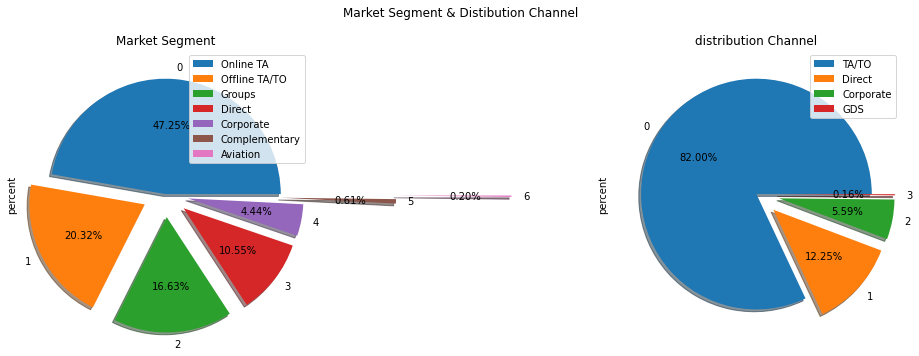

In [690]:
#Booking Market Segment & Distribution Channel

distribution_channel = df.stb.freq(['distribution_channel'], cum_cols = False)
market_segment = df.stb.freq(['market_segment'], cum_cols = False)
market_segment

plt.figure(figsize = (15, 5))

plt.subplot(1,2,1)
market_segment['percent'].plot.pie(explode = [0, 0.2, 0.2, 0.2, 0.2, 1, 2], 
                                               autopct = '%1.2f%%',
                                               shadow = True
                                               )
plt.legend(market_segment['market_segment'])
plt.title('Market Segment')

plt.subplot(1,2,2)
distribution_channel['percent'].plot.pie(explode = [0, 0.2, 0.2, 0.2], 
                                               autopct = '%1.2f%%',
                                               shadow = True
                                               )
plt.legend(distribution_channel['distribution_channel'])
plt.title('distribution Channel')

plt.suptitle('Market Segment & Distibution Channel')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Deposit Type')

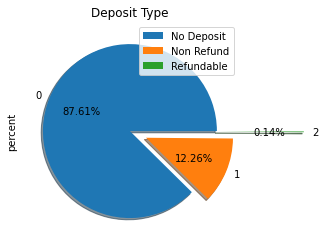

In [691]:
#Deposit Type

deposit_type = df.stb.freq(['deposit_type'],cum_cols = False)


deposit_type['percent'].plot.pie(explode = [0, 0.2, 1], 
                                               autopct = '%1.2f%%',
                                               shadow = True
                                               )
plt.legend(deposit_type['deposit_type'])
plt.title('Deposit Type')

In [692]:
country_data =  df.stb.freq(['country'], cum_cols = False)

guest_map = px.choropleth(country_data,
                    locations=country_data['country'],
                    color=country_data["percent"], 
                    hover_name=country_data['country'], 
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Booking Map")
guest_map.show()

In [693]:
# from the histogram below we can see that the highest frequency of adr is where adr is around 61.5 - 62.49

fig = px.histogram(df, x="adr",
                  title = 'ADR Distribution'
                  )
fig.show()


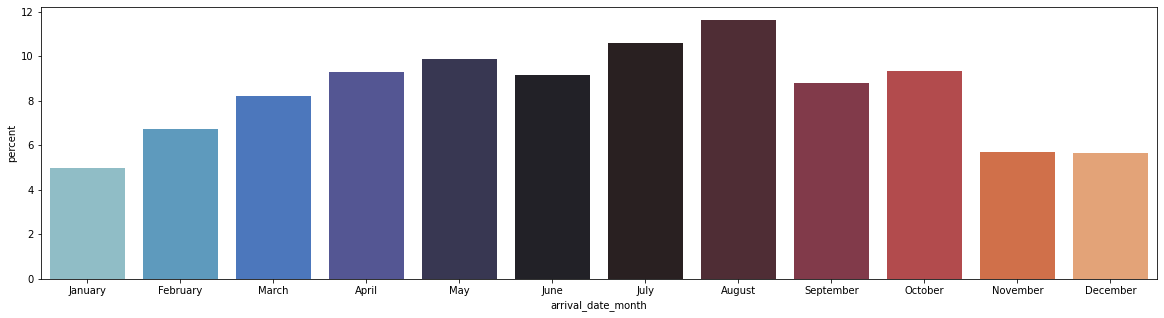

In [694]:
#Arrival Date

order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

arrival = df.stb.freq(['arrival_date_month'], cum_cols = False)
# arrival['arrival_date_month'] = pd.Categorical(arrival['arrival_date_month'], categories=order, ordered=True)
arrival
plt.figure(figsize = (20, 5))
sns.barplot(x = 'arrival_date_month', y='percent', data = arrival, order = order, palette = 'icefire')
plt.show()

# we see from here that percentage of the arrival that august has the highest total booking 
# we are assuming the summer holiday in 2015 - 2017 happen around the same day 
# that might be the reason why booking for that arrival is higher  especially in august 

# however in this dataset we see that the month of august and july appear 3 times while the rest of the month appear
# for only 2 times this definitely have an effect on the number of percentage

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, '2015-07'),
  Text(1, 0, '2015-08'),
  Text(2, 0, '2015-09'),
  Text(3, 0, '2015-10'),
  Text(4, 0, '2015-11'),
  Text(5, 0, '2015-12'),
  Text(6, 0, '2016-01'),
  Text(7, 0, '2016-02'),
  Text(8, 0, '2016-03'),
  Text(9, 0, '2016-04'),
  Text(10, 0, '2016-05'),
  Text(11, 0, '2016-06'),
  Text(12, 0, '2016-07'),
  Text(13, 0, '2016-08'),
  Text(14, 0, '2016-09'),
  Text(15, 0, '2016-10'),
  Text(16, 0, '2016-11'),
  Text(17, 0, '2016-12'),
  Text(18, 0, '2017-01'),
  Text(19, 0, '2017-02'),
  Text(20, 0, '2017-03'),
  Text(21, 0, '2017-04'),
  Text(22, 0, '2017-05'),
  Text(23, 0, '2017-06'),
  Text(24, 0, '2017-07'),
  Text(25, 0, '2017-08')])

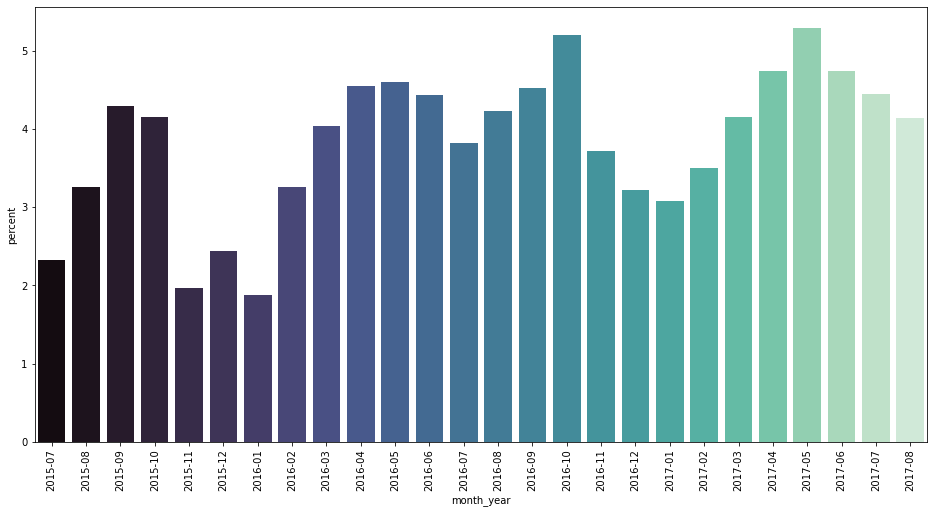

In [695]:
plt.figure(figsize = (16, 8))
sns.barplot(data = arrival_month_year, x = 'month_year', y = 'percent', palette = 'mako')
plt.xticks(rotation = 90)

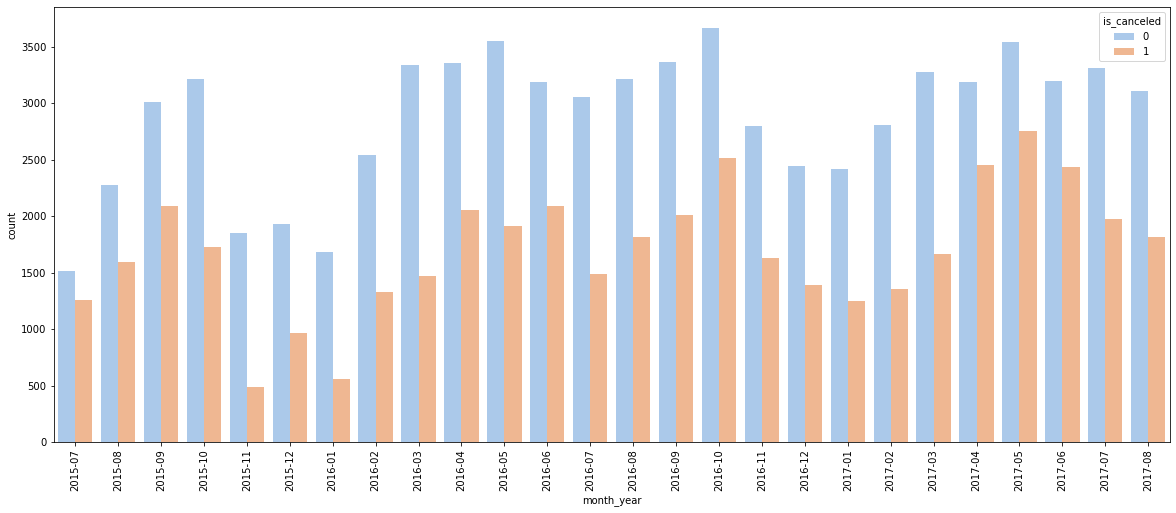

In [696]:
#based on many journal and article that number of cancellation rise as the number of booking increases, we want to how is this affecting portugal hotel bookings

plt.figure(figsize = (20, 8))
sns.countplot(df['month_year'], hue = df['is_canceled'], palette = 'pastel')
plt.xticks(rotation = 90)

plt.show()

# as we can see from the chart below the number of cancellation generally goes up as the number of booking goes up
# however it doesn't seem number of cancellation has a linear effect towards number of booking 
# as we can see that there are certain month that has a higher percentage of confirmed booking compared to other months 

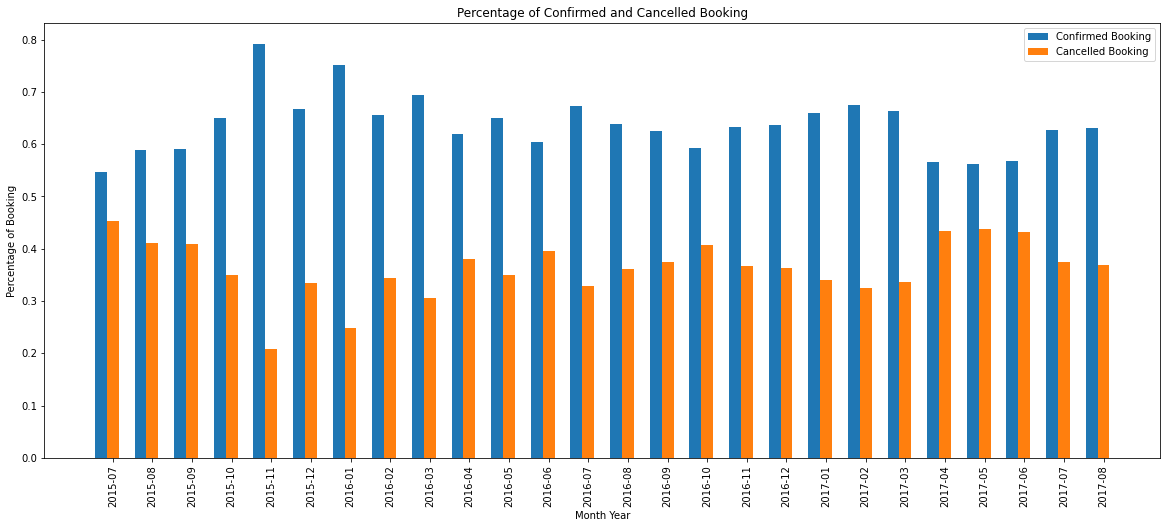

In [697]:
step = np.arange(0,26)
month_year_cancellation=pd.crosstab(df['month_year'], df['is_canceled'], normalize = 'index')

fig, ax = plt.subplots(figsize = (20, 8))


ax.bar(step - 0.3, month_year_cancellation[0], width = 0.3)
ax.bar(step, month_year_cancellation[1], width = 0.3)
ax.set_xticks(step)
ax.set_xticklabels(month_year_cancellation.index, Rotation = 90)
plt.legend(['Confirmed Booking', 'Cancelled Booking'])
plt.xlabel('Month Year')
plt.ylabel ('Percentage of Booking')
plt.title('Percentage of Confirmed and Cancelled Booking')

plt.show()

# look at the table below and see the month of November 2015 and January 2016, majority of the month has a cancellation rate around
# 30 to 40 percent however these two months are the only months with cancellation rate below 30 % 
# and why is so ? 
# is it just because the randomness or is there any explanation behind it 
# hypothesis testing needed for this ??? 

In [698]:
lead_time_canceled =  pd.crosstab(df['lead_time_month'], df['is_canceled'], normalize = 'index')
lead_time_canceled_deposit = pd.crosstab(df['lead_time_month'], df['deposit_type'], normalize = 'index')

fig = go.Figure(data=[
    go.Bar(name='Confirmed Booking', x=lead_time_canceled.index, y=lead_time_canceled[0]),
    go.Bar(name='Cancelled Booking', x=lead_time_canceled.index, y=lead_time_canceled[1],marker_color = 'crimson')
])
# Change the bar mode
fig.update_layout(barmode='group', title = 'Percentage of Confirmed Booking and Cancelled Booking per Lead Time Month',
                 yaxis=dict(
                 title='Percentage',
                 titlefont_size=16,
                 tickfont_size=14,)
                ,xaxis=dict(
                 title='Lead Time Month',
                 titlefont_size=16,
                 tickfont_size=14,))
fig.show()


# we can see from the graph booking that has lead time more than 7 months are more likely to be canceled than to be confirmed
# in general the longer the lead time the higher the chances the booking to be cancelled compared to be confirmed 

In [699]:
# we see that the 100 % of confirmed booking in month of 23 / 24 is only a sample of 1 single booking

pd.crosstab(df['lead_time_month'], df['is_canceled']).sort_index(ascending = True)[22:] 

is_canceled,0,1
lead_time_month,,
24,1,0


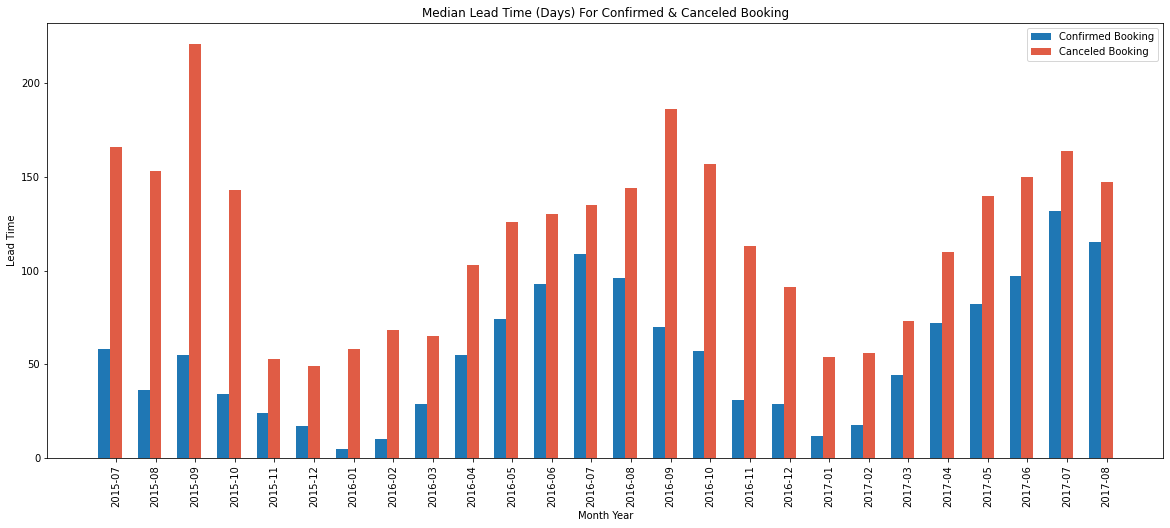

In [700]:
# we definitely see a pattern here for each month 
# December 2015 has the lowest median lead time for canceled and confirmed booking  
# for booking with arrival date in the spring & summer (march - august) in general have a longer median lead time compared to
# booking for fall - winter season (September - December)
# For each year September tend to have the highest median lead time for canceled booking 
# (we couldn't find any specific information why september in general has the highest lead time for canceled booking for the
# past 2 years)

# lead time for canceled booking and confirmed booking are somewhat positively correlated 
# means month that has a low lead time for confirmed booking usually has a low leadtime for canceled booking as well

# with month with high lead time of confirmed booking usually has a high lead time for their canceled booking

# in general canceled booking lead time always higher compared to confirmed booking for each month

lead_time_booking =  pd.crosstab(df['month_year'], df['is_canceled'], values = df['lead_time'], aggfunc = 'median')

step2 = np.arange(0,26)

fig, ax = plt.subplots(figsize = (20, 8))

ax.bar(step2 - 0.3, lead_time_booking[0], width = 0.3)
ax.bar(step2, lead_time_booking[1], width = 0.3, color = '#E05C45')
ax.set_xticks(step2)
ax.set_xticklabels(lead_time_booking.index, Rotation = 90)
plt.xlabel('Month Year')
plt.ylabel('Lead Time')
plt.title('Median Lead Time (Days) For Confirmed & Canceled Booking')
plt.legend(['Confirmed Booking', 'Canceled Booking'])
plt.show()


ValueError: The number of FixedLocator locations (25), usually from a call to set_ticks, does not match the number of ticklabels (23).

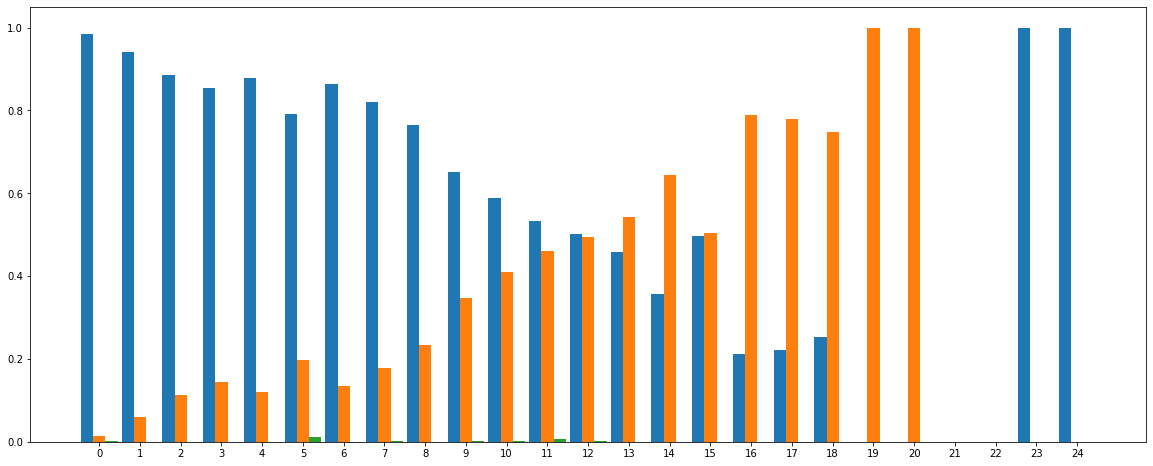

In [701]:
# for longer advance reservations (13 months and above) there are generally more non refundable deposit type compared
# no deposit type this will protect hotel from cancellation from long advance reservation

# suggestion more non refund deposit policy should be implemented for longer booking period more than 7 months in advance
# since from our analysis booking that's more than 7 months in advances are more likely to be,cancelled
# hotel could implement (no refund rates for cheaper price)
# many hotels / TA used that technique to prevent from longer advance reservation cancellation

step2 = np.arange(0,25)

fig, ax = plt.subplots(figsize = (20, 8))
ax.bar(lead_time_canceled.index - 0.3, lead_time_canceled_deposit['No Deposit'], width = 0.3)
ax.bar(lead_time_canceled.index, lead_time_canceled_deposit['Non Refund'], width = 0.3)
ax.bar(lead_time_canceled.index + 0.3, lead_time_canceled_deposit['Refundable'], width = 0.3)

ax.set_xticks(step2)
ax.set_xticklabels(lead_time_canceled_deposit.index, Rotation = 90)
plt.legend(['No Deposit', 'Non Refund', 'Refundable'])
plt.xlabel('Month Year')
plt.ylabel ('Percentage of Deposit Type (%)')
plt.title('Percentage of Confirmed and Cancelled Booking')

In [ ]:
#we have separated the booking location into domestic booking (local) and international booking, how does each different booking location affecting cancellation

booking_location =  pd.crosstab(df['booking_location'], df['is_canceled'], normalize = 'index')

fig = go.Figure(data=[
    go.Bar(name='Confirmed Booking', x=booking_location.index, y=booking_location[0]),
    go.Bar(name='Cancelled Booking', x=booking_location.index, y=booking_location[1],marker_color = 'crimson')])

fig.update_layout(barmode='group', title = 'Percentage of Confirmed Booking and Cancelled Booking for each booking location',
                 yaxis=dict(
                 title='Percentage of Booking (%)',
                 titlefont_size=16,
                 tickfont_size=14,)
                ,xaxis=dict(
                 title='Booking Location',
                 titlefont_size=16,
                 tickfont_size=14,))

fig.show()


# more than half of the booking that's made within portugal are cancelled
# booking that's made within portugal are almost 2.5 X more likely to be cancelled compared to booking that's made outside portugal

# local booking are more likely to be cancelled

In [ ]:
#first we want to look at the deposit type and the effect of cancellation and how deposit type affect cancellation rate of both booking location

booking_location_cancelled =  pd.crosstab(df['booking_location'],df['is_previously_cancelled'],normalize= 'index')

fig = go.Figure(data=[
    go.Bar(name='Previously Not Cancelled', x=booking_location_cancelled.index, y=booking_location_cancelled[0]),
    go.Bar(name='Previously  Cancelled', x=booking_location_cancelled.index, y=booking_location_cancelled[1],marker_color = 'crimson')])

fig.update_layout(barmode='group', title = 'Percentage of Previously Cancellation',
                 yaxis=dict(
                 title='Percentage of previous booking (%)',
                 titlefont_size=16,
                 tickfont_size=14,)
                ,xaxis=dict(
                 title='Booking Location',
                 titlefont_size=16,
                 tickfont_size=14,))

fig.show()

# our first analysis why local booking has higher cancellation rate compared to international booking is because 
# the higher previously cancelled booking rate in the local booking

# fromo our analysis that 92% of booking that's previously cancelled will be cancelled again 
# this might have an effect why local booking has higher cancellation rate compared to international booking

In [ ]:
booking_location_deposit = pd.crosstab(df['booking_location'],df['deposit_type'],normalize= 'index')

fig = go.Figure(data=[
    go.Bar(name='No Deposit', x=booking_location_deposit.index, y=booking_location_deposit['No Deposit']),
    go.Bar(name='Non Refund', x=booking_location_deposit.index, y=booking_location_deposit['Non Refund']),
    go.Bar(name='Refundable', x=booking_location_deposit.index, y=booking_location_deposit['Refundable'])])


fig.update_layout(barmode='group', title = 'Percentage of Deposit for each booking location',
                 yaxis=dict(
                 title='Percentage of Deposit Type (%)',
                 titlefont_size=16,
                 tickfont_size=14,)
                ,xaxis=dict(
                 title='Booking Location',
                 titlefont_size=16,
                 tickfont_size=14,)) 
fig.show()


# second reason is why local booking has more cancellation compared to international booking is because 
# there are more non refunable deposit booking for local booking compared to international booking
# from our past analysis we see that 99% of non refund booking were cancelled this might be the second reason why 
# local booking has more cancellation compared to international booking

# almost all international booking are made without deposit 99.2 %

In [ ]:
deposit_cancellation = pd.crosstab(df['deposit_type'],df['is_canceled'],normalize= 'index')

fig = go.Figure(data=[
    go.Bar(name='Confirmed Booking', x=deposit_cancellation.index, y=deposit_cancellation[0]),
    go.Bar(name='Canceled Booking', x=deposit_cancellation.index, y=deposit_cancellation[1])])


fig.update_layout(barmode='group', title = 'Percentage of Cancellation for each Deposit Type',
                 yaxis=dict(
                 title='Percentage of Booking (%)',
                 titlefont_size=16,
                 tickfont_size=14,)
                ,xaxis=dict(
                 title='Deposit Type',
                 titlefont_size=16,
                 tickfont_size=14,)) 
fig.show()


# we see that almost every non refund booking are most likely to be cancelled compared to other deposit ty[e]
# while the other 2 deposit type 

In [ ]:
location_segment =  pd.crosstab(df['market_segment'], df['booking_location'], normalize = 'columns')
location_segment_step = np.arange(0,7)
location_segment


fig, ax = plt.subplots(figsize = (15, 8))
ax.bar(location_segment_step - 0.3, location_segment['International'], width = 0.3)
ax.bar(location_segment_step, location_segment['Local'], width = 0.3)
# ax.bar(lead_time_canceled.index + 0.3, lead_time_canceled_deposit['Refundable'], width = 0.3)

ax.set_xticks(location_segment_step)
ax.set_xticklabels(location_segment.index, Rotation = 90)
# plt.legend(['No Deposit', 'Non Refund', 'Refundable'])
plt.xlabel('Market Segment')
plt.ylabel ('Market Segment Booking (%)')
plt.legend(['International', 'Local'])
plt.title('Booking For Each Market Segment Per Booking Location')

plt.show()

# looking at the chart down below we see that for International Booking it is mainly Dominated By OTA (Online Travel Agent)
# for the local booking the booking market segment are kind of spread out 
# with the highest percentage belong to group booking 

# as we know from our past analysis Group Booking is the only market segment that has the higher cancelation rate compared
# to it's confirmed rate 61 % Cancelation Rate

# this is one of the reason my local booking have a higher cancellation rate compared to international booking 

In [ ]:
adults_cancellation =  pd.crosstab(df['adults'], df['is_canceled'], normalize = 'index')


fig = go.Figure(data=[
    go.Bar(name='Confirmed Booking', x=adults_cancellation.index, y=adults_cancellation[0], marker_color = 'forestgreen'),
    go.Bar(name='Cancelled Booking', x=adults_cancellation.index, y=adults_cancellation[1],marker_color = 'crimson')])

fig.update_layout(barmode='group', title = 'Percentage of Cancellation Per Number of Adults',
                 yaxis=dict(
                 title='Cancellation Rate (%) / Each Numbers of Adults',
                 titlefont_size=16,
                 tickfont_size=14,)
                ,xaxis=dict(
                 title='Number of Adults',
                 titlefont_size=16,
                 tickfont_size=14,))

fig.show()

# we see that there are no confirmed booking for booking with more than 4 adults 
# suggestion : 
#hotel should limit the number of adults for each booking, since there are no confirmed booking with more than 4 adults
# hotel could resell (overbooking) the room that has 4 than 4 adults in the booking since hotel know they all will be cancelled

In [ ]:
guest_cancellation = pd.crosstab(df['guests'], df['is_canceled'], normalize = 'index')

fig = go.Figure(data=[
    go.Bar(name='Confirmed Booking', x=guest_cancellation.index, y=guest_cancellation[0], marker_color = 'forestgreen'),
    go.Bar(name='Cancelled Booking', x=guest_cancellation.index, y=guest_cancellation[1],marker_color = 'crimson')])

fig.update_layout(barmode='group', title = 'Percentage of Cancellation Per Number of guest',
                 yaxis=dict(
                 title='Cancellation Rate (%) / Each Numbers of guest',
                 titlefont_size=16,
                 tickfont_size=14,)
                ,xaxis=dict(
                 title='Number of guest',
                 titlefont_size=16,
                 tickfont_size=14,))

fig.show()

# for number of guest there's a slight difference with number of adults in term of cancellation 
# majority of booking with more than 5 guest in a single booking are likely to be cancelled
# however there are a few of confirmed booking with total guest of 10 and 12 
# booking with more than 12 of total guest are 100% cancelled

In [ ]:
market_cancellation = pd.crosstab(df['market_segment'], df['is_canceled'], normalize = 'index')

fig = go.Figure(data=[
    go.Bar(name='Confirmed Booking', x=market_cancellation.index, y=market_cancellation[0]),
    go.Bar(name='Cancelled Booking', x=market_cancellation.index, y=market_cancellation[1],marker_color = 'crimson')])

fig.update_layout(barmode='group', title = 'Percentage of Booking Per Market Segment',
                 yaxis=dict(
                 title='Percentage of booking (%) / Market Segment',
                 titlefont_size=16,
                 tickfont_size=14,)
                ,xaxis=dict(
                 title='Market Segment',
                 titlefont_size=16,
                 tickfont_size=14,))

fig.show()

# We can see pattern here for Aviation booking, Complementary, Corporate, and Direct cancellation rate range from 12 - 22 %
# while booking from travel agent market segment (online / offline) on average has 34 - 37 % cancellation
# the last is booking from group which has cancellation rate of 61 %, group booking has the highest cancellation among
# all market segment

# insight, direct booking has the lowest cancellation rate among all market segment, hotel should have program to encourage 
# people to book through direct booking (easy access of direct booking, multiple payment system, loyalty card, credit card bundle deals)

In [ ]:
# Deposit Type For each Market Segment

market_deposit = pd.crosstab(df['market_segment'], df['deposit_type'], normalize = 'index')

fig = go.Figure(data=[
    go.Bar(name='No Deposit', x=market_deposit.index, y=market_deposit['No Deposit']),
    go.Bar(name='Non Refund', x=market_deposit.index, y=market_deposit['Non Refund']),
    go.Bar(name='Refundable', x=market_deposit.index, y=market_deposit['Refundable'])])


fig.update_layout(barmode='group', title = 'Percentage of Deposit Type for each Market Segment',
                 yaxis=dict(
                 title='Percentage of Deposit Type (%)',
                 titlefont_size=16,
                 tickfont_size=14,)
                ,xaxis=dict(
                 title='Market Segment',
                 titlefont_size=16,
                 tickfont_size=14,)) 
fig.show()

In [ ]:
repeated_cancelled = pd.crosstab(df['is_repeated_guest'], df['is_canceled'], normalize = 'index')


fig = go.Figure(data=[
    go.Bar(name='Confirmed Booking', x=['Non Repeated Booking', 'Repeated Booking'], y=repeated_cancelled[0]),
    go.Bar(name='Cancelled Booking', x=['Non Repeated Booking', 'Repeated Booking'], y=repeated_cancelled[1],marker_color = 'crimson')])

fig.update_layout(barmode='group', title = 'Percentage of Confirmed Booking and Cancelled Booking for Repeat & Non Repeat',
                 yaxis=dict(
                 title='Percentage of Booking (%)',
                 titlefont_size=16,
                 tickfont_size=14,)
                ,xaxis=dict(
                 title='Booking Types',
                 titlefont_size=16,
                 tickfont_size=14,))

fig.show()


# customer who has a repeated booking (existing customers) are less likely to cancel their booking compared to new customers

# non repeated booking are more than twice more likely to be cancelled compared to repeated booking 

# suggestion: 
# hotels should focus more on re attract existing customers becase as we can see that repeated booking are less likely to be 
# cancelled compared to non repeated booking 


In [ ]:
## where does all repeated guest comes from 

repeated_distribution =  pd.crosstab(df['distribution_channel'], df['is_repeated_guest'], normalize = 'index')
repeated_distribution

fig = go.Figure(data=[
    go.Bar(name='Non Repeated Booking', x=repeated_distribution.index, y=repeated_distribution[0]),
    go.Bar(name='Repeated Booking', x=repeated_distribution.index, y=repeated_distribution[1])])


fig.update_layout(barmode='group', title = 'Percentage of Cancellation per Distribution Channel',
                 yaxis=dict(
                 title='Percentage of Booking (%)',
                 titlefont_size=16,
                 tickfont_size=14,)
                ,xaxis=dict(
                 title='Distribution Channel',
                 titlefont_size=16,
                 tickfont_size=14,)) 
fig.show()

# we can see  the majority of the booking from all the market segment are non repeated booking(new customers)
# however we see that corporate has the higest rate of repeated booking at (23. 5 %) that's almost a quarter means 
# almost 1 / 4 corporate booking is a repeated booking, 
# we can say that business traveler in this case is corporate booking are more likely to retain compared to leisure booking
# (we are assuming that other than corporate booking is leisure traveler)

In [ ]:
#how does the pattern of booking that's previosly cancelled towards the future booking compared to booking that's never been cancelled before

previously_cancelled =pd.crosstab(df['is_previously_cancelled'], df['is_canceled'], normalize = 'index')


fig = go.Figure(data=[
    go.Bar(name='Confirmed Booking', x=previously_cancelled.index, y=previously_cancelled[0]),
    go.Bar(name='Cancelled Booking', x=previously_cancelled.index, y=previously_cancelled[1])])


fig.update_layout(barmode='group', title = 'Percentage of Previously Cancelled Booking',
                 yaxis=dict(
                 title='Percentage of Booking (%)',
                 titlefont_size=16,
                 tickfont_size=14,)
                ,xaxis=dict(
                 title='Previously Cancelled',
                 titlefont_size=16,
                 tickfont_size=14,)) 
fig.show()

# we see from the data below we see that almost 92% of booking that has been cancelled will be cancelled again

# suggestion : all cancelled booking before should be on non refund deposit on the future booking because 
# we see that 92 % of past cancelled booking will cancel again by leveraging the policy we will be able to protect the hotel
# from losing revenue 

In [ ]:
#first we want to look at the Required Car Parking Space and the effect of cancellation

parking_cancel = pd.crosstab(df['parking_space'], df['is_canceled'], normalize = 'index')
parking_cancel

fig = go.Figure(data=[
    go.Bar(name='Confirmed Booking', x=parking_cancel.index, y=parking_cancel[0]),
    go.Bar(name='Cancelled Booking', x=parking_cancel.index, y=parking_cancel[1])])


fig.update_layout(barmode='group', title = 'Parking Space And Cancelled Booking',
                 yaxis=dict(
                 title='Percentage of Booking / Cancelled Booking (%)',
                 titlefont_size=16,
                 tickfont_size=14,)
                ,xaxis=dict(
                 title='Required Parking Space',
                 titlefont_size=16,
                 tickfont_size=14,)) 
fig.show()

# we see that booking who require a parking space never been cancelled based on the hotel booking database 
# there are around 6 % of booking that require a car parking space 


# the hotel could promote anything that makes people who vehicle life easier, eg(free valet, free charging for electric car, and etc)
# since there're no cancellation for people who drives to the hotel attracting more of them is not a bad idea at all 

### Feature Engineering

In [702]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
adults                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
reservation_status_date           0
arrival_date                      0
arrival_month               

In [703]:
# preprocessing label using map because there are only 2 unique values

df['booking_location_encoded'] =df['booking_location'].map({'International':1, 'Local':0})
df['hotel_encoded'] = df['hotel'].map({'City Hotel': 1, 'Resort Hotel':0})


In [704]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_month,arrival_day,month_year,total_stays,guests,kids,lead_time_month,booking_location,is_previously_cancelled,is_booking_changes,parking_space,booking_location_encoded,hotel_encoded
0,Resort Hotel,0,342,2015,July,27,1,2,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07,0,2.0,0.0,11,Local,0,1,0,0,0
1,Resort Hotel,0,737,2015,July,27,1,2,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07,0,2.0,0.0,24,Local,0,1,0,0,0
2,Resort Hotel,0,7,2015,July,27,1,1,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015-07,1,1.0,0.0,0,International,0,0,0,1,0
3,Resort Hotel,0,13,2015,July,27,1,1,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015-07,1,1.0,0.0,0,International,0,0,0,1,0
4,Resort Hotel,0,14,2015,July,27,1,2,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,7,Wednesday,2015-07,2,2.0,0.0,0,International,0,0,0,1,0


In [705]:
for i in range(len(df)):
    if df.iloc[i]['country'] == 'PRT':
        df.at[i, 'country'] = 1
    elif df.iloc[i]['country'] == 'GBR':
        df.at[i, 'country'] = 2
    else:
        df.at[i, 'country'] = 0

In [706]:
for i in range(len(df)):
    if df.iloc[i]['country'] == 'PRT':
        df.at[i, 'country'] = 1
    elif df.iloc[i]['country'] == 'GBR':
        df.at[i, 'country'] = 2
    else:
        df.at[i, 'country'] = 0

In [707]:
df['country'].value_counts()

0    119234
1       101
2        55
Name: country, dtype: int64

In [708]:
df.dropna(inplace=True)
df.shape

(118985, 40)

In [709]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df['arrival_date'] = pd.to_datetime(df['arrival_date'])

In [710]:
df['stay_duration'] = df['reservation_status_date'] - df['arrival_date']
df['stay_duration'] = df['stay_duration'] / np.timedelta64(1, 'D')
df['stay_duration'] = df['stay_duration'].astype(int)

In [711]:
for i in range(len(df)):
    if df.iloc[i]['stay_duration']<0:
        df.at[i, 'stay_duration'] = -1

In [712]:
df.isna().sum()

hotel                             129
is_canceled                       129
lead_time                         129
arrival_date_year                 129
arrival_date_month                129
arrival_date_week_number          129
arrival_date_day_of_month         129
adults                            129
meal                              129
country                           129
market_segment                    129
distribution_channel              129
is_repeated_guest                 129
previous_cancellations            129
previous_bookings_not_canceled    129
reserved_room_type                129
assigned_room_type                129
booking_changes                   129
deposit_type                      129
days_in_waiting_list              129
customer_type                     129
adr                               129
required_car_parking_spaces       129
total_of_special_requests         129
reservation_status                129
reservation_status_date           129
arrival_date

In [713]:
df.dropna(inplace=True)
df.shape

(118985, 41)

In [714]:
def roomChange(row):
    if row['assigned_room_type'] == row['reserved_room_type']:
        return False
    else:
        return True

df['change_in_room'] = df.apply(roomChange, axis=1)

In [715]:
lb = LabelEncoder()
var = ['hotel', 'customer_type', 'deposit_type', 'change_in_room', 'market_segment', 'distribution_channel', 'country','booking_location']
for item in var:
    df[item] = lb.fit_transform(df[item])
df = pd.get_dummies(df, columns=['hotel', 'customer_type', 'deposit_type', 'change_in_room', 'market_segment', 'distribution_channel', 'country'])

In [716]:
df.shape

(118985, 60)

In [717]:
df.drop(['meal', 'assigned_room_type', 'reserved_room_type', 'reservation_status', 'reservation_status_date', 'arrival_date','arrival_date_month','arrival_day','month_year'], axis=1, inplace=True)

In [718]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118985 entries, 0 to 119389
Data columns (total 51 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     118985 non-null  float64
 1   lead_time                       118985 non-null  float64
 2   arrival_date_year               118985 non-null  float64
 3   arrival_date_week_number        118985 non-null  float64
 4   arrival_date_day_of_month       118985 non-null  float64
 5   adults                          118985 non-null  float64
 6   is_repeated_guest               118985 non-null  float64
 7   previous_cancellations          118985 non-null  float64
 8   previous_bookings_not_canceled  118985 non-null  float64
 9   booking_changes                 118985 non-null  float64
 10  days_in_waiting_list            118985 non-null  float64
 11  adr                             118985 non-null  float64
 12  required_car_par

In [719]:
df['booking_location']

0         1
1         1
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: booking_location, Length: 118985, dtype: int32

### Model Building

In [720]:
# Seperate target variable for model building 

y_model = df.iloc[:,0]
X_model = (df.iloc[:,1:60])
y_model.describe()

count    118985.000000
mean          0.370753
std           0.483008
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: is_canceled, dtype: float64

In [721]:
X_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118985 entries, 0 to 119389
Data columns (total 50 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   lead_time                       118985 non-null  float64
 1   arrival_date_year               118985 non-null  float64
 2   arrival_date_week_number        118985 non-null  float64
 3   arrival_date_day_of_month       118985 non-null  float64
 4   adults                          118985 non-null  float64
 5   is_repeated_guest               118985 non-null  float64
 6   previous_cancellations          118985 non-null  float64
 7   previous_bookings_not_canceled  118985 non-null  float64
 8   booking_changes                 118985 non-null  float64
 9   days_in_waiting_list            118985 non-null  float64
 10  adr                             118985 non-null  float64
 11  required_car_parking_spaces     118985 non-null  float64
 12  total_of_special

In [722]:
# Split to train and test with 70-30 ratio

X_train, X_test, y_train, y_test = train_test_split(X_model, y_model, test_size=0.3, random_state=25)

In [723]:
# Implement standart scaler method

standardScalerX = StandardScaler()
X_train = standardScalerX.fit_transform(X_train)
X_test = standardScalerX.fit_transform(X_test)

In [743]:
%%timeit

#Logistic Regression
logreg = LogisticRegression(max_iter=500).fit(X_train, y_train)
scores = cross_val_score(logreg, X_train, y_train, cv=5)
logreg_pred = logreg.predict(X_test)
print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(logreg.score(X_test, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, logreg_pred)))
print(confusion_matrix(y_test, logreg_pred))

Average cross validation score: 0.974
Test accuracy: 0.974
F1 score: 0.966
[[21817   652]
 [  263 12964]]
Average cross validation score: 0.974
Test accuracy: 0.974
F1 score: 0.966
[[21817   652]
 [  263 12964]]
Average cross validation score: 0.974
Test accuracy: 0.974
F1 score: 0.966
[[21817   652]
 [  263 12964]]
Average cross validation score: 0.974
Test accuracy: 0.974
F1 score: 0.966
[[21817   652]
 [  263 12964]]
Average cross validation score: 0.974
Test accuracy: 0.974
F1 score: 0.966
[[21817   652]
 [  263 12964]]
Average cross validation score: 0.974
Test accuracy: 0.974
F1 score: 0.966
[[21817   652]
 [  263 12964]]
Average cross validation score: 0.974
Test accuracy: 0.974
F1 score: 0.966
[[21817   652]
 [  263 12964]]
Average cross validation score: 0.974
Test accuracy: 0.974
F1 score: 0.966
[[21817   652]
 [  263 12964]]
14.1 s ± 605 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [725]:
def lr_model(X,y,thresholds,test_size):
    '''This function takes in X and y data, a list of prob thresholds, and the proportion of our data
       to be split into test data, and runs Logistic Regression on the provided data.  Our model is 
       enveloped in two loops, the firs tis over probability thresholds and the 2nd (inner loop) is 
       over a range of numbers to be used for our train/test random_state splits.  I'm doing this to 
       make sure our results are averaged over a bunch of potential training/testing situations...
       I'm basically doing cross-validation without holding on to a final test hold-out sample.
    '''
    # Logistic Regression
    # Create placehold for results
    results = []

    # Loop over different values for the probability threshold
    for i in thresholds:
        
        # Loop over different random states for our train/test split.  I'm doing
        # this because I'm concerned that a single split of these relatively small datasets
        # won't give us a reliable assessment of how our choice of threshold affects
        # performance metrics.  By trying out 50 different random splits of the data
        # I'm able to compute an average effect of the prob threshold on each metric of interest.
        # I have more confidence in the accuracy, fnr, fpr and F1 scores knowing
        # that they reflect an average over 50 different train/test splits.
        for r in range(1,50):
            X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=test_size,random_state=r)

            # Normalize Data
            X_train_means = X_train.mean()
            X_train_std = X_train.std()

            # Please note that I am using means and standard deviations from the training
            # data to normalize BOTH the training and the test data.
            X_train = (X_train - X_train_means)/X_train_std
            X_test = (X_test - X_train_means)/X_train_std
            
            # Fit logistic regression
            log_reg = LogisticRegression().fit(X_train,y_train)
            
            # Get predicted probabilities
            y_pred_prob = log_reg.predict_proba(X_test)[:,1]

            # Create class assignments given threshold value
            y_pred_class = binarize([y_pred_prob],threshold=i)[0]

            # Create Metrics
            confusion = metrics.confusion_matrix(y_test, y_pred_class)
            results.append({'randomS':r,
                           'probThreshold':i,
                           'accuracy':metrics.accuracy_score(y_test, y_pred_class).round(2),
                           'fnr':(confusion[1,0] / (confusion[1,0] + confusion[1,1])).round(2),
                           'fpr':(confusion[0,1] / (confusion[0,0] + confusion[0,1])).round(2),
                           'F1':metrics.f1_score(y_test,y_pred_class)
                           })
    results = pd.DataFrame(results)
    results = results[['probThreshold','accuracy','fnr','fpr','F1']].groupby('probThreshold').mean()
    return results

In [730]:
lr_model(X_model,y_model,[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],0.3)

,accuracy,fnr,fpr,F1
probThreshold,,,,
0.0,0.370408,0.000000,1.000000,0.540984
0.1,0.940000,0.005714,0.094898,0.922836
0.2,0.960000,0.010000,0.060000,0.946835
0.3,0.969388,0.010408,0.046122,0.956486
0.4,0.970000,0.019796,0.032653,0.962810
0.5,0.972857,0.021429,0.029796,0.966006
0.6,0.978776,0.031633,0.020000,0.967511
0.7,0.972245,0.050000,0.010000,0.964612
0.8,0.961429,0.084490,0.010000,0.949427


Wall time: 13min 25s


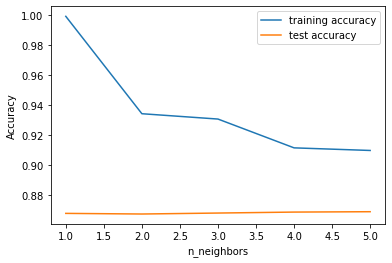

In [550]:
%%time
#KNN

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 6)
for n_neighbors in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [551]:
%%time

knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
scores = cross_val_score(knn, X_train, y_train, cv=5)
knn_pred = knn.predict(X_test)
print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(knn.score(X_test, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, knn_pred)))
print(confusion_matrix(y_test, knn_pred))

Average cross validation score: 0.864
Test accuracy: 0.868
F1 score: 0.818
[[20353  2116]
 [ 2604 10623]]
Wall time: 2min 46s


In [552]:
%%time

#Decision Tree
tree = DecisionTreeClassifier().fit(X_train, y_train)
scores = cross_val_score(tree, X_train, y_train, cv=5)
tree_pred = tree.predict(X_test)
print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(tree.score(X_test, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, tree_pred)))
print(confusion_matrix(y_test, tree_pred))

Average cross validation score: 0.952
Test accuracy: 0.954
F1 score: 0.941
[[20824  1645]
 [    0 13227]]
Wall time: 689 ms


In [574]:
  #Hyperparameter tuning done for decision tree classifier
from joblib import parallel_backend
with parallel_backend('threading', n_jobs=2):

  #RANDOM SEARCH--------------------------------------------
    import time
    start_time = time.time()
    print("RandomizedSearchCV-Decision tree")
  # setting the following ranges/values for the hyperparameters of the DT:
  # min sample leaf: 20 to 400 on an interval of 5
  # max depth: 12 to 40 with an interval of 2
    parameters={'min_samples_leaf' : range(20,200,5),'max_depth': 
              range(12,40,2),'criterion':['gini','entropy']}
    tree_random = RandomizedSearchCV(tree,parameters,n_iter=25,cv=5)
    tree_random.fit(X_train, y_train)
    rand_parm=tree_random.best_params_
    print(rand_parm)
    print("accuracy Score for Decision Tree:{0:6f}".
        format(tree_random.score(X_test,y_test)))
    print("--- %s seconds ---" % (time.time() - start_time))

RandomizedSearchCV-Decision tree
{'min_samples_leaf': 35, 'max_depth': 36, 'criterion': 'gini'}
accuracy Score for Decision Tree:0.985713
--- 26.284165382385254 seconds ---


In [757]:
%%time
#Using the parameters obtained from HyperParameterTuning in the DecisionTreeClassifier 
tree_Rand = DecisionTreeClassifier(**rand_parm)

#Fitting & Predicting the data based on the DT created from best hyperparameters
tree_Rand.fit(X_train,y_train)
tree_Rand_predict = tree_Rand.predict(X_test)

print("Train score: {:.3f}".format(tree_Rand.score(X_train, y_train)))
print("Test accuracy: {:.3f}".format(tree_Rand.score(X_test, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, tree_Rand_predict)))
print(confusion_matrix(y_test, tree_Rand_predict))

Train score: 0.987
Test accuracy: 0.986
F1 score: 0.981
[[22215   254]
 [  256 12971]]
Wall time: 403 ms


In [731]:
%%time

# Defining the Random forest classifier (default) and fitting the train dataset
rf = RandomForestClassifier().fit(X_train, y_train)
scores = cross_val_score(rf, X_train, y_train, cv=5)
rf_pred = rf.predict(X_test)
print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(rf.score(X_test, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, rf_pred)))
print(confusion_matrix(y_test, rf_pred))

Average cross validation score: 0.990
Test accuracy: 0.992
F1 score: 0.990
[[22317   152]
 [  120 13107]]
Wall time: 37.2 s


In [584]:
%%time

#Hyperparameter tuning done for random forest classifier

#RANDOM SEARCH--------------------------------------------

import time
start_time = time.time()

print("RandomizedSearchCV-Random forest")
# setting the following ranges/values for the hyperparameters of the Random Forest:
# min sample leaf: 20 to 200 on an interval of 10
# max depth: 5 to 20 with an interval of 3
# max features taking values in 10,20,30,40
# n estimators assuming values in 30,40,50,60
rand_parameters={'min_samples_leaf' : range(20,200,10),'max_depth': 
            range(5,20,3),'max_features':[10,20,30,40],'n_estimators':[30,40,50,60]}
rf_random = RandomizedSearchCV(rf,rand_parameters,n_iter=25,cv=5)
rf_random.fit(X_train, y_train)
random_parm=rf_random.best_params_
print(random_parm)
print("accuracy Score for Random Forest:{0:6f}".
      format(rf_random.score(X_test,y_test)))

print("--- %s seconds ---" % (time.time() - start_time))

RandomizedSearchCV-Random forest
{'n_estimators': 40, 'min_samples_leaf': 50, 'max_features': 30, 'max_depth': 14}
accuracy Score for Random Forest:0.985797
--- 651.614709854126 seconds ---


In [593]:
rf_random.best_params_

{'n_estimators': 40,
 'min_samples_leaf': 50,
 'max_features': 30,
 'max_depth': 14}

In [598]:
%%time

#Using the parameters obtained from HyperParameterTuning in the RandomForestClassifier 
rf_Rand = RandomForestClassifier(**random_parm)

#Fitting & Predicting the data based on the RF created from best hyperparameters
rf_Rand.fit(X_train,y_train)
rf_Rand_predict = rf_Rand.predict(X_test)

print("Train score: {:.3f}".format(rf_Rand.score(X_train, y_train)))
print("Test accuracy: {:.3f}".format(rf_Rand.score(X_test, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, rf_Rand_predict)))
print(confusion_matrix(y_test, rf_Rand_predict))

Train score: 0.986
Test accuracy: 0.986
F1 score: 0.981
[[22117   352]
 [  160 13067]]


In [599]:
%%time

#Multi Layer Perceptron
mlp = MLPClassifier(hidden_layer_sizes=[35, 20], alpha=0.001, solver='adam', activation='relu')
mlp.fit(X_train, y_train)
mlp_pred = mlp.predict(X_test)
print("Train score: {:.3f}".format(mlp.score(X_train, y_train)))
print("Test accuracy: {:.3f}".format(mlp.score(X_test, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, mlp_pred)))
print(confusion_matrix(y_test, mlp_pred))

Train score: 0.993
Test accuracy: 0.988
F1 score: 0.984
[[22296   173]
 [  238 12989]]
Wall time: 49.4 s


In [758]:
%%time

#Linear SVC
svc = LinearSVC().fit(X_train, y_train)
scores = cross_val_score(svc, X_train, y_train, cv=5)
svc_pred = svc.predict(X_test)
print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(svc.score(X_test, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, svc_pred)))
print(confusion_matrix(y_test, svc_pred))

Average cross validation score: 0.975
Test accuracy: 0.976
F1 score: 0.968
[[21834   635]
 [  226 13001]]
Wall time: 49.7 s


In [754]:
# Classification Reports 
print("Logistic", classification_report(y_test, logreg_pred))
print("Knn", classification_report(y_test, knn_pred))
print("DT",classification_report(y_test, tree_Rand_predict))
print("RT", classification_report(y_test, rf_Rand_predict))
print("MLP", classification_report(y_test, mlp_pred))
print("SVC", classification_report(y_test, svc_pred))

Logistic               precision    recall  f1-score   support

         0.0       0.99      0.97      0.98     22469
         1.0       0.95      0.98      0.97     13227

    accuracy                           0.97     35696
   macro avg       0.97      0.98      0.97     35696
weighted avg       0.97      0.97      0.97     35696

Knn               precision    recall  f1-score   support

         0.0       0.89      0.91      0.90     22469
         1.0       0.83      0.80      0.82     13227

    accuracy                           0.87     35696
   macro avg       0.86      0.85      0.86     35696
weighted avg       0.87      0.87      0.87     35696

DT               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     22469
         1.0       0.98      0.98      0.98     13227

    accuracy                           0.99     35696
   macro avg       0.98      0.98      0.98     35696
weighted avg       0.99      0.99      0.99     35696

RT 

Text(570.5454545454544, 0.5, 'Actual Labels')

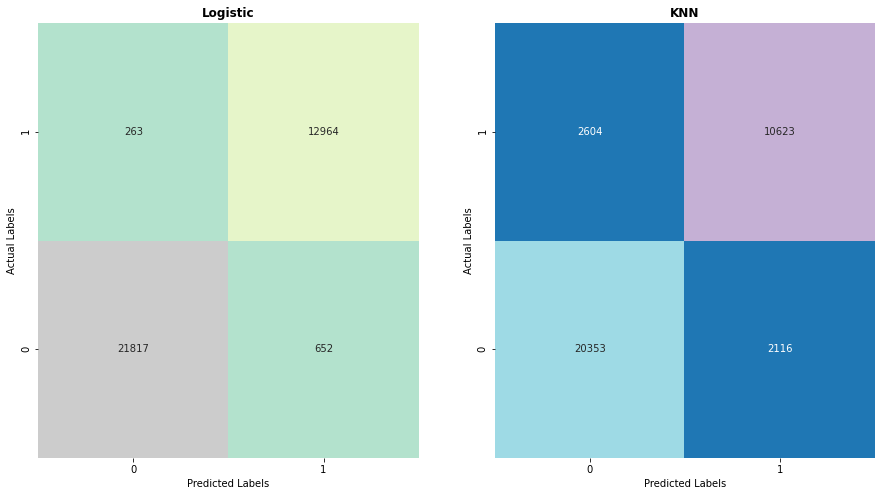

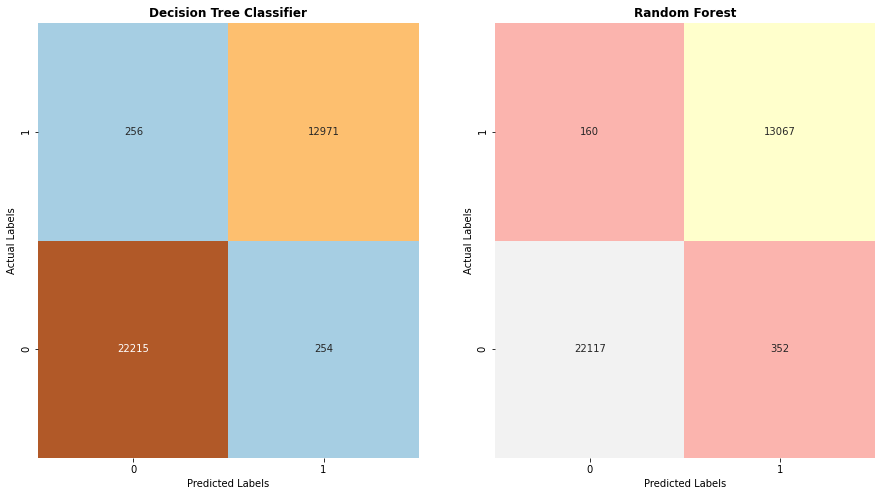

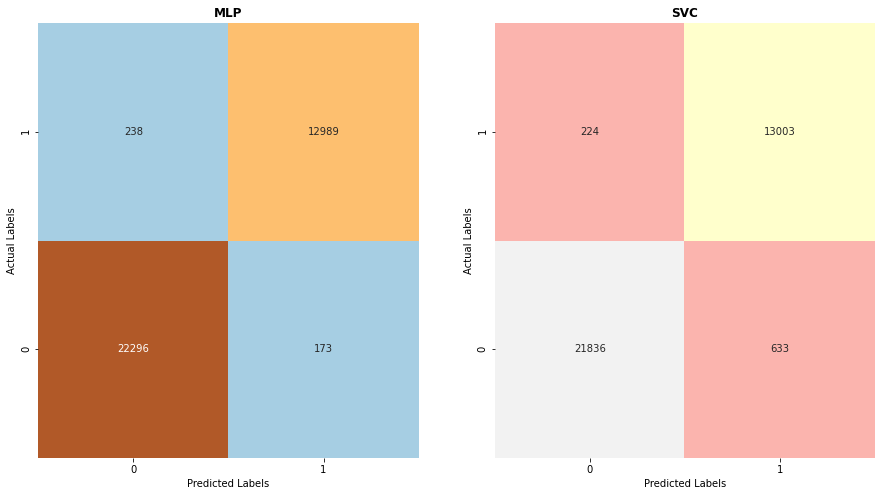

In [756]:
# Confusion Matrix 

Logistic_Matrix = confusion_matrix(y_test,logreg_pred)
KNN_Matrix = confusion_matrix(y_test, knn_pred)
DT_Matrix = confusion_matrix(y_test, tree_Rand_predict)
RF_Matrix = confusion_matrix(y_test, rf_Rand_predict)
MLP_Matrix = confusion_matrix(y_test, mlp_pred)
SVC_Matrix = confusion_matrix(y_test, svc_pred)


fig, ax = plt.subplots(1, 2, figsize=(15, 8))
sns.heatmap(Logistic_Matrix,annot=True, fmt="d", cbar=False, cmap="Pastel2",  ax = ax[0]).set_ylim([0,2])
ax[0].set_title("Logistic", weight='bold')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('Actual Labels')
sns.heatmap(KNN_Matrix,annot=True, fmt="d" ,cbar=False, cmap="tab20", ax = ax[1]).set_ylim([0,2])
ax[1].set_title("KNN", weight='bold')
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('Actual Labels')

fig, axe = plt.subplots(1, 2, figsize=(15, 8))
sns.heatmap(DT_Matrix,annot=True, fmt="d", cbar=False, cmap="Paired", ax = axe[0]).set_ylim([0,2])
axe[0].set_title("Decision Tree Classifier", weight='bold')
axe[0].set_xlabel('Predicted Labels')
axe[0].set_ylabel('Actual Labels')
sns.heatmap(RF_Matrix,annot=True, fmt="d", cbar=False, cmap="Pastel1", ax = axe[1]).set_ylim([0,2])
axe[1].set_title("Random Forest", weight='bold')
axe[1].set_xlabel('Predicted Labels')
axe[1].set_ylabel('Actual Labels')

fig, axe = plt.subplots(1, 2, figsize=(15, 8))
sns.heatmap(MLP_Matrix,annot=True, fmt="d", cbar=False, cmap="Paired", ax = axe[0]).set_ylim([0,2])
axe[0].set_title("MLP", weight='bold')
axe[0].set_xlabel('Predicted Labels')
axe[0].set_ylabel('Actual Labels')
sns.heatmap(SVC_Matrix,annot=True, fmt="d", cbar=False, cmap="Pastel1", ax = axe[1]).set_ylim([0,2])
axe[1].set_title("SVC", weight='bold')
axe[1].set_xlabel('Predicted Labels')
axe[1].set_ylabel('Actual Labels')